# Figures and Data Analysis

### Eric Sun

In [1]:
import csv
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
import pylab as pl
import numpy as np
import pandas as pd
from scipy import stats
from os import listdir
from os.path import isfile, join

## Representational dissimilarity $R$

In [2]:
def DLfc8Grapher (filename, saved_name, frange_list, title, x_title, metric='no'):
    
    imported_file = []
    imported_file = np.genfromtxt('Data/'+filename, delimiter=',')
    # Transposes files from the original DNN Dissimilarity results output
    transposed_file = imported_file.T
    
    fc8_diss_values = transposed_file[-1] # records fc8 layer outputs
    fc8_diss_values = fc8_diss_values.tolist()
    del fc8_diss_values[0]
    fc8_diss_values = fc8_diss_values[::-1] # flip for dot lightness
    taskNames = pl.frange(frange_list[0], frange_list[1], frange_list[2])   
    
    N = len(taskNames) - len(fc8_diss_values)
    taskNames = taskNames[N:]
    # converting to python list and rounding so human_point matches exactly
    taskNamesconverted = np.ndarray.tolist(taskNames)
    taskNames = [round(n, 2) for n in taskNamesconverted]

    from matplotlib.ticker import FormatStrFormatter
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.plot(taskNames[::-1], fc8_diss_values, 'k', linewidth=2.0)
    #plt.title(title)
    plt.xlabel(x_title, fontsize=18)
    plt.ylabel('Rep. dissimilarity, $R$', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    if metric == 'yes':
        score = concavity_metric(fc8_diss_values)
        plt.text(0.05*max(taskNames), 0.05*max(fc8_diss_values), 'Concavity Score = ' + str(round(score, 3)))
    
    plt.tight_layout()
    plt.xlim(np.min(taskNames), np.max(taskNames))
    plt.ylim(0,None)
    plt.gca().invert_xaxis()
    plt.savefig('Figures/FIGURES/'+saved_name+'.png', dpi=800)
    plt.show()
    
def concavity_metric (task_values):
    '''
    DEPRECATED
    '''
    # Assigns a score of concavity based on the positive differences between the initial and subsequent values
    score = 0
    initial_task = task_values[0]
    for task in task_values:
        if task >= initial_task:
            score += task-initial_task
#        else:
#            break # terminates after first sub-initial value (so score looks only at first region)
    return (score)


def AVG_DLfc8Grapher (filename, saved_name, frange_list, title, x_title, labels, metric='no', norm=False, show_title=False):
    '''
    norm = True --> normalize by average R
    '''
    
    # read file
    imported_file = []
    imported_file = np.genfromtxt('Data/'+filename, delimiter=',')
    
    # normalize
    if norm is True:
        #row_sums = np.sum(imported_file,axis=1)
        row_means = np.mean(imported_file,axis=1)
        for row in range(imported_file.shape[0]):
            if row_means[row] > 0:
                imported_file[row,:] = imported_file[row,:]/row_means[row]
    
    # get average and error bars
    fc8_diss_values = np.mean(imported_file, axis=0)
    #sems = np.std(imported_file, axis=0)
    #lower = fc8_diss_values - sems
    #upper = fc8_diss_values + sems
    lower = np.percentile(imported_file, 25, axis=0)
    upper = np.percentile(imported_file, 75, axis=0)
    
    # get task names
    taskNames = pl.frange(frange_list[0], frange_list[1], frange_list[2])   
    N = len(taskNames) - len(fc8_diss_values)
    taskNames = taskNames[N:]
    # converting to python list and rounding so human_point matches exactly
    taskNamesconverted = np.ndarray.tolist(taskNames)
    taskNames = [round(n, 2) for n in taskNamesconverted]

    # plot figure
    from matplotlib.ticker import FormatStrFormatter
    fig, ax = plt.subplots()
    if show_title is True:
        plt.title(title, fontsize=24)
    plt.plot(taskNames[::-1], fc8_diss_values, 'k', linewidth=2.0)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.fill_between(taskNames[::-1], lower, upper, facecolor='k', alpha=0.1)
    if labels[0] is True:
        plt.ylabel('Rep. dissimilarity, $R$', fontsize=22)
    elif labels[0] is 'r':
        plt.ylabel('Rep. dissimilarity, $r$', fontsize=22)
    else:
        plt.ylabel('  ', fontsize=22)
    if labels[1] is True:
        plt.xlabel(x_title, fontsize=22)
    else:
        plt.xlabel('  ', fontsize=22)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(np.min(taskNames), np.max(taskNames))
    plt.ylim(0,None)
    plt.gca().invert_xaxis()
    plt.tight_layout()
    plt.savefig('Figures/FIGURES/AVG_'+saved_name+'.png', dpi=800)
    plt.show()

#### White to Black

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: MatplotlibDeprecationWarning: numpy.arange


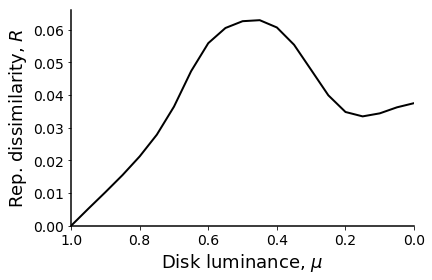

In [13]:
DLfc8Grapher('SG_WtoB_fc8only.csv', 'SG_WtoB',[0, 1.00, 0.05], 'SG_WtoB', 'Disk luminance, $\mu$')

### Average plots with std shading

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:82: MatplotlibDeprecationWarning: numpy.arange


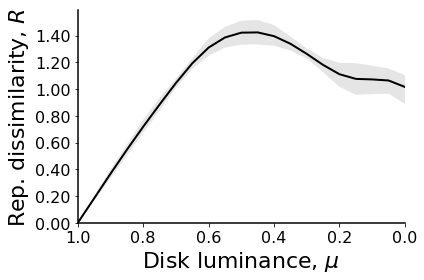

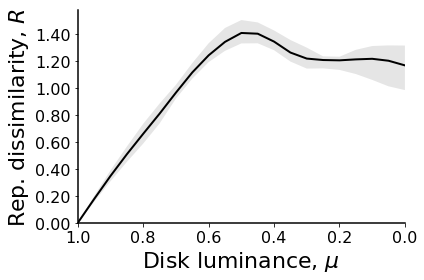

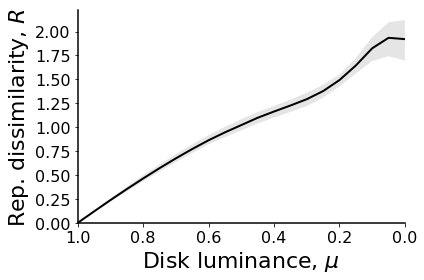

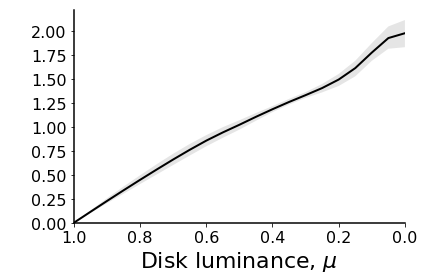

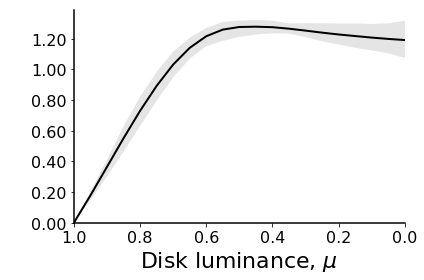

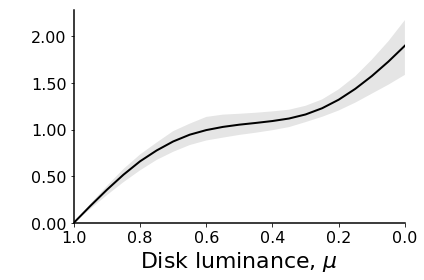

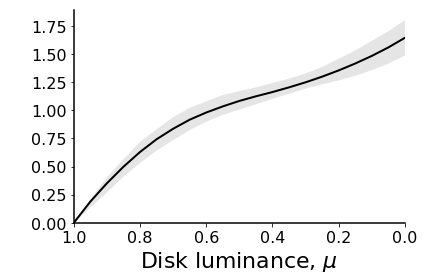

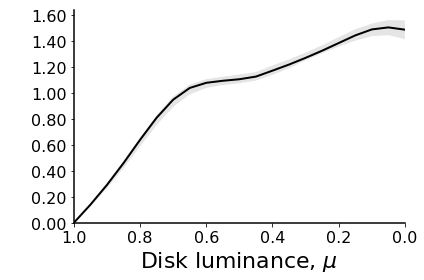

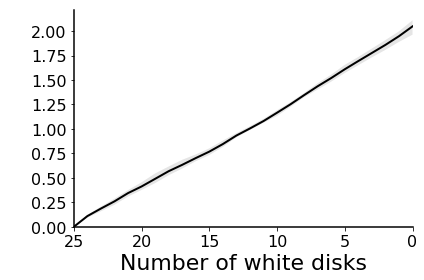

In [4]:
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__SG', 'SG_Illusion', [0, 1.00, 0.05], 'SG_Illusion', 'Disk luminance, $\mu$', labels=[True, True],norm=True)
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__SG_noborder', 'SG_Illusion_noborder', [0, 1.00, 0.05], 'SG_Illusion_noborder', 'Disk luminance, $\mu$', labels=[True, True],norm=True)
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__SG_NoLinesControl', 'NoLines', [0, 1.00, 0.05], 'NoLines', 'Disk luminance, $\mu$', labels=[True, True],norm=True)
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__SG_OffsetLinesControl', 'OffsetLines', [0, 1.00, 0.05], 'OffsetLines', 'Disk luminance, $\mu$', labels=[False, True],norm=True)
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__SG_SineLinesControl', 'SineLines', [0, 1.00, 0.05], 'SineLines', 'Disk luminance, $\mu$', labels=[False, True],norm=True)
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__image_maskdots', 'NatDots', [0, 1.00, 0.05], 'NatDots', 'Disk luminance, $\mu$', labels=[False, True],norm=True)
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__image_maskpixels', 'NatPix', [0, 1.00, 0.05], 'NatPix', 'Disk luminance, $\mu$', labels=[False, True],norm=True)
AVG_DLfc8Grapher('vgg19/MoreControls_vgg19/MATLAB_vgg19_fc8L1_1to0__SG_LargeDotsControl', 'LargeDots', [0, 1.00, 0.05], 'LargeDots', 'Disk luminance, $\mu$', labels=[False, True],norm=True)
AVG_DLfc8Grapher('vgg19_num_dots_contol/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_NumDotsControl', 'NumDots', [0, 25, 1], 'NumDots', 'Number of white disks', labels=[False, True],norm=True)

Gray Background Controls: 3X Border, 2X Border, 1X Border, No Border

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:82: MatplotlibDeprecationWarning: numpy.arange


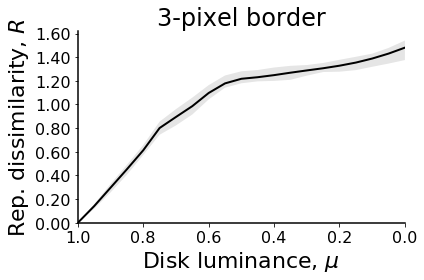

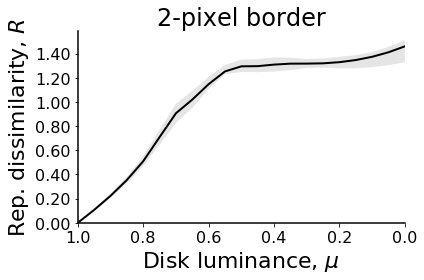

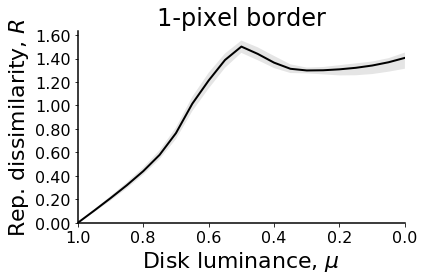

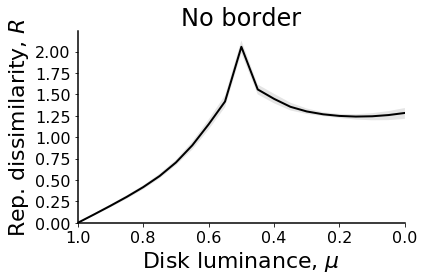

In [11]:
AVG_DLfc8Grapher('vgg19_all_TripleSizedBorder/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_GrayBkdControl', '3XGrayBkd', [0, 1.00, 0.05], '3-pixel border', 'Disk luminance, $\mu$', labels=[True, True],norm=True,show_title=True)
AVG_DLfc8Grapher('vgg19_all_DoubleSizedBorder/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_GrayBkdControl', '2XGrayBkd', [0, 1.00, 0.05], '2-pixel border', 'Disk luminance, $\mu$', labels=[True, True],norm=True,show_title=True)
AVG_DLfc8Grapher('vgg19/GrayBkd/MATLAB_vgg19_no_randomization_fc8L1_1to0__SG_GrayBkdControl', 'GrayBkd', [0, 1.00, 0.05], '1-pixel border', 'Disk luminance, $\mu$', labels=[True, True],norm=True,show_title=True)
AVG_DLfc8Grapher('vgg19_all_NoBorder/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_GrayBkdControl', 'NBGrayBkd', [0, 1.00, 0.05], 'No border', 'Disk luminance, $\mu$', labels=[True, True],norm=True,show_title=True)

### Without mean-normalization

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:82: MatplotlibDeprecationWarning: numpy.arange


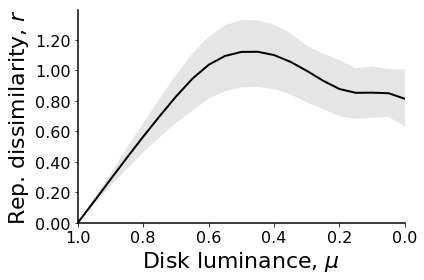

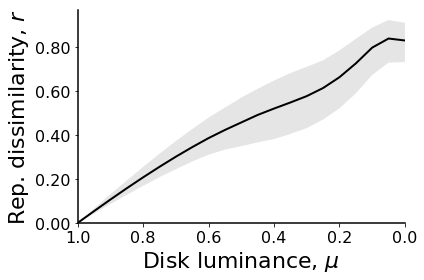

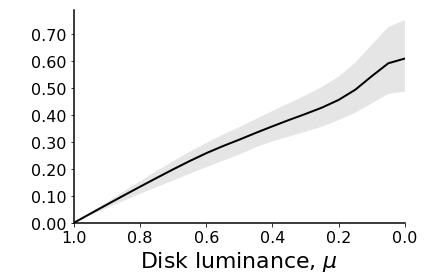

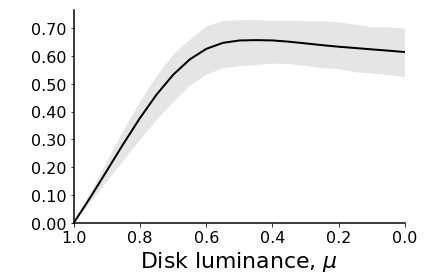

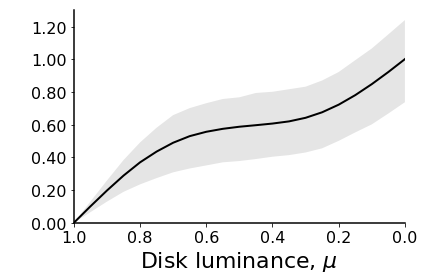

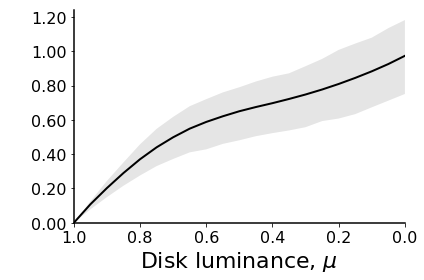

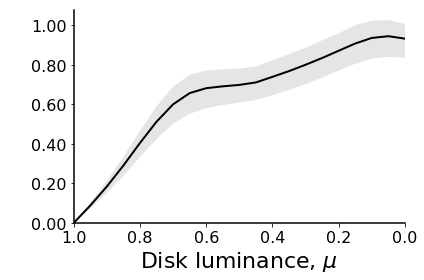

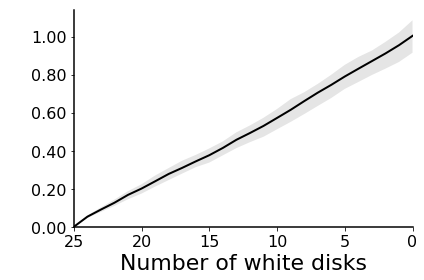

In [4]:
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__SG', 'nonorm_SG_Illusion', [0, 1.00, 0.05], 'nonorm_SG_Illusion', 'Disk luminance, $\mu$', labels=['r', True],norm=False)
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__SG_NoLinesControl', 'nonorm_NoLines', [0, 1.00, 0.05], 'nonorm_NoLines', 'Disk luminance, $\mu$', labels=['r', True],norm=False)
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__SG_OffsetLinesControl', 'nonorm_OffsetLines', [0, 1.00, 0.05], 'nonorm_OffsetLines', 'Disk luminance, $\mu$', labels=[False, True],norm=False)
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__SG_SineLinesControl', 'nonorm_SineLines', [0, 1.00, 0.05], 'nonorm_SineLines', 'Disk luminance, $\mu$', labels=[False, True],norm=False)
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__image_maskdots', 'nonorm_NatDots', [0, 1.00, 0.05], 'nonorm_NatDots', 'Disk luminance, $\mu$', labels=[False, True],norm=False)
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__image_maskpixels', 'nonorm_NatPix', [0, 1.00, 0.05], 'nonorm_NatPix', 'Disk luminance, $\mu$', labels=[False, True],norm=False)
AVG_DLfc8Grapher('vgg19/MoreControls_vgg19/MATLAB_vgg19_fc8L1_1to0__SG_LargeDotsControl', 'nonorm_LargeDots', [0, 1.00, 0.05], 'nonorm_LargeDots', 'Disk luminance, $\mu$', labels=[False, True],norm=False)
AVG_DLfc8Grapher('vgg19_num_dots_contol/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_NumDotsControl', 'nonorm_NumDots', [0, 25, 1], 'nonorm_NumDots', 'Number of white disks', labels=[False, True],norm=False)

### Reviewer request: Color-parameterized grids

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:82: MatplotlibDeprecationWarning: numpy.arange


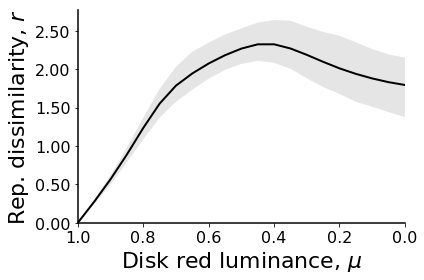

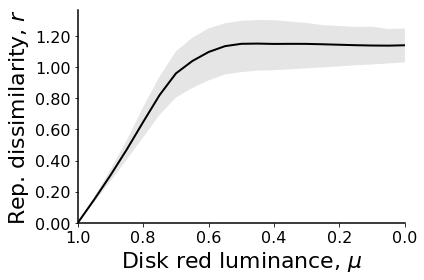

In [3]:
AVG_DLfc8Grapher('RedParameterizations/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG', 'Red_SG_Illusion', [0, 1.00, 0.05], 'Red_SG_Illusion', 'Disk red luminance, $\mu$', labels=['r', True],norm=False)
AVG_DLfc8Grapher('RedParameterizations/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_NoLinesControl', 'Red_NoLines', [0, 1.00, 0.05], 'Red_NoLines', 'Disk red luminance, $\mu$', labels=['r', True],norm=False)

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:82: MatplotlibDeprecationWarning: numpy.arange


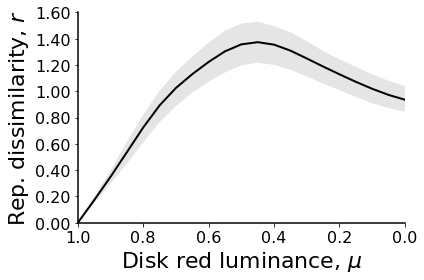

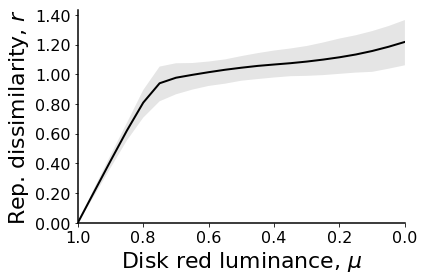

In [5]:
AVG_DLfc8Grapher('RedParameterizations/MATLAB_resnet101_no_randomization_1_fc1000L1_1to0__SG', 'Red_SG_Illusion_resnet', [0, 1.00, 0.05], 'Red_SG_Illusion_resnet', 'Disk red luminance, $\mu$', labels=['r', True],norm=False)
AVG_DLfc8Grapher('RedParameterizations/MATLAB_resnet101_no_randomization_1_fc1000L1_1to0__SG_NoLinesControl', 'Red_NoLines_resnet', [0, 1.00, 0.05], 'Red_NoLines_resnet', 'Disk red luminance, $\mu$', labels=['r', True],norm=False)

# Non-monotinicity model correlate: $L^1$ and $L^2$

#### VGG-19 (1000 illusions, 1000+ controls, 1000 natural images)

In [4]:
def Score_NonMonotonic (mat, norm=False, layer_idx=-1):
    '''
    Takes a M x N Numpy array input where rows correspond to individual images and columns correspond to conditions.
    Entries correspond to representational dissimilarity R
    
    norm [Boolean] = whether to normalize the representational dissimilarity (i.e. unit row vectors)
    layer_idx
    
    Returns:
        NM_mat = M x N array with non-monotonicity scores
    '''
    
    # NORMALIZE
    if norm is True:
        #row_sums = np.sum(mat,axis=1)
        row_means = np.mean(mat,axis=1)
        for row in range(mat.shape[0]):
            if row_means[row] > 0:
                mat[row,:] = mat[row,:]/row_means[row]
                
    # DECOMPOSITION
    NM_mat = np.copy(mat)
    for row in range(mat.shape[0]):
        fc8_diss_values = mat[row,:]
        ill_diss = []
        top_val = 0
        for i, diss_val in enumerate(fc8_diss_values):
            if diss_val > top_val:
                top_val = diss_val
                ill_diss.append(0)
            else:
                ill_diss.append(top_val-diss_val)
        NM_mat[row,:] = ill_diss
        
    return (NM_mat)

# White to Black (main results)

Normal SGs (L1, with Border)

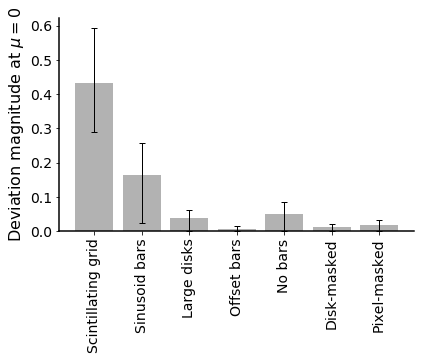

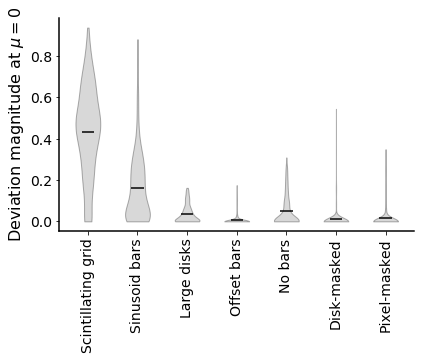

p-values compared to SG:
1.7993437472244527e-54
1.0393710631410937e-94
1.1111978818775507e-112
4.5108314792498533e-94
1.082951051083025e-118
5.352955843926172e-113


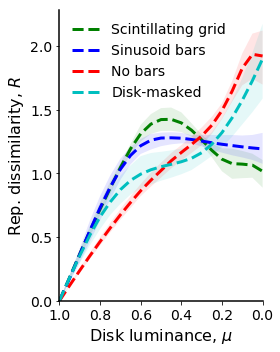

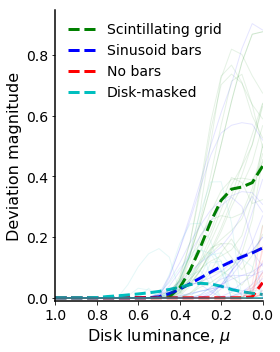

In [6]:
# Scintillating Grid
sg_filepath = 'Data\\vgg19\\MATLAB_vgg19L1_white_to_black__SG'

# No Lines Control
nl_filepath = 'Data\\vgg19\\MATLAB_vgg19L1_white_to_black__SG_NoLinesControl'

# Offset Lines Control
ol_filepath = 'Data\\vgg19\\MATLAB_vgg19L1_white_to_black__SG_OffsetLinesControl'

# Sinusoidal Lines Control
sl_filepath = 'Data\\vgg19\\MATLAB_vgg19L1_white_to_black__SG_SineLinesControl'

# Natural Image Masked Pixel
np_filepath = 'Data\\vgg19\\MATLAB_vgg19L1_white_to_black__image_maskpixels'

# Natural Image Masked Dots
nd_filepath = 'Data\\vgg19\\MATLAB_vgg19L1_white_to_black__image_maskdots'

# Large Dots 
ld_filepath = 'Data\\vgg19\\MoreControls_vgg19\\MATLAB_vgg19_fc8L1_1to0__SG_LargeDotsControl'


# color controls (not used)
r1_filepath = 'Data\\vgg19\\MoreControls_vgg19\\MATLAB_vgg19_fc8L1_1to0__SG_BlueBkdControl'
r2_filepath = 'Data\\vgg19\\MoreControls_vgg19\\MATLAB_vgg19_fc8L1_1to0__SG_GreenBkdControl'
r3_filepath = 'Data\\vgg19\\MoreControls_vgg19\\MATLAB_vgg19_fc8L1_1to0__SG_RedBkdControl'

# Read data in as Numpy arrays
sg_mat = np.genfromtxt(sg_filepath, delimiter=',')
nl_mat = np.genfromtxt(nl_filepath, delimiter=',')
ol_mat = np.genfromtxt(ol_filepath, delimiter=',')
sl_mat = np.genfromtxt(sl_filepath, delimiter=',')
np_mat = np.genfromtxt(np_filepath, delimiter=',')
nd_mat = np.genfromtxt(nd_filepath, delimiter=',')
ld_mat = np.genfromtxt(ld_filepath, delimiter=',')

r1_mat = np.genfromtxt(r1_filepath, delimiter=',')
r2_mat = np.genfromtxt(r2_filepath, delimiter=',')
r3_mat = np.genfromtxt(r3_filepath, delimiter=',')
r_mat = np.vstack([ol_mat,sl_mat,ld_mat])


# Make reduced and control sets
R_mat = np.vstack([ol_mat,sl_mat,ld_mat])
C_mat = np.vstack([nl_mat,np_mat,nd_mat])

# Get Non-monotonicity measurements
sg_nms = Score_NonMonotonic(sg_mat, norm=True)
nl_nms = Score_NonMonotonic(nl_mat, norm=True)
ol_nms = Score_NonMonotonic(ol_mat, norm=True)
sl_nms = Score_NonMonotonic(sl_mat, norm=True)
np_nms = Score_NonMonotonic(np_mat, norm=True)
nd_nms = Score_NonMonotonic(nd_mat, norm=True)
ld_nms = Score_NonMonotonic(ld_mat, norm=True)

R_nms = Score_NonMonotonic(R_mat, norm=True)
C_nms = Score_NonMonotonic(C_mat, norm=True)

r_nms = Score_NonMonotonic(r_mat, norm=True)

# Make bar plot figure

sg_scores = sg_nms[:,-1]
nl_scores = nl_nms[:,-1]
ol_scores = ol_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]
ld_scores = ld_nms[:,-1]

plt.figure(figsize=(6,5))
plt.bar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k', alpha=0.3)
plt.errorbar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k',
             yerr=([np.mean(sg_scores)-np.percentile(sg_scores,25), np.mean(sl_scores)-np.percentile(sl_scores,25), np.mean(ld_scores)-np.percentile(ld_scores,25), np.mean(ol_scores)-np.percentile(ol_scores,25), np.mean(nl_scores)-np.percentile(nl_scores,25), np.mean(nd_scores)-np.percentile(nd_scores,25), np.mean(np_scores)-np.percentile(np_scores,25)],
                   [np.abs(np.mean(sg_scores)-np.percentile(sg_scores,75)), np.abs(np.mean(sl_scores)-np.percentile(sl_scores,75)), np.abs(np.mean(ld_scores)-np.percentile(ld_scores,75)), np.abs(np.mean(ol_scores)-np.percentile(ol_scores,75)), np.abs(np.mean(nl_scores)-np.percentile(nl_scores,75)), np.abs(np.mean(nd_scores)-np.percentile(nd_scores,75)), np.abs(np.mean(np_scores)-np.percentile(np_scores,75))]),
        ecolor='k', capsize=3, elinewidth=1, linewidth=0)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating grid', 'Sinusoid bars', 'Large disks', 'Offset bars', 'No bars', 'Disk-masked', 'Pixel-masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_WtoB_L1_dev_monotonic.png', dpi=800)
plt.show()


# violin plot
plt.figure(figsize=(6,5))
fig = plt.violinplot([sg_scores, sl_scores, ld_scores, ol_scores, nl_scores, nd_scores, np_scores],showmeans=True,showextrema=False)
fig['cmeans'].set_color('k')
for pc in fig['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating grid', 'Sinusoid bars', 'Large disks', 'Offset bars', 'No bars', 'Disk-masked', 'Pixel-masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_WtoB_L1_dev_monotonic_violin.png', dpi=800)
plt.show()
#####


# Make bar plot figure

sg_scores = sg_nms[:,-1]
r_scores = r_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]

# P-values from Mann-Whitney (Wilcoxon)
print ('p-values compared to SG:')
from scipy.stats import mannwhitneyu
T, p = mannwhitneyu(sg_scores, sl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ld_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ol_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nd_scores)
print (p)
T, p = mannwhitneyu(sg_scores, np_scores)
print (p)


# Make plot of representational dissimiarities
plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_mat, axis=0),'g--', linewidth=3.0,label='Scintillating grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_mat, axis=0),'b--', linewidth=3.0,label='Sinusoid bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_mat, axis=0),'r--', linewidth=3.0,label='No bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_mat, axis=0),'c--', linewidth=3.0,label='Disk-masked')



colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_mat, sl_mat, nl_mat, nd_mat]):
    #sems = np.std(mat, axis=0)
    #lower = np.mean(mat, axis=0) - sems
    #upper = np.mean(mat, axis=0) + sems
    lower = np.percentile(mat, 25, axis=0)
    upper = np.percentile(mat, 75, axis=0)
    plt.fill_between(np.arange(0,1.05,0.05)[::-1],lower, upper, facecolor=colors[j], alpha=0.1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Rep. dissimilarity, $R$', fontsize=16)
plt.ylim(0,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_WtoB_L1_R_curves.png',dpi=800)
plt.show()

# Make plot of non-monotonic model correlate measurements

num_randoms_to_show = 20

plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_nms, axis=0),'g--', linewidth=3.0,label='Scintillating grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_nms, axis=0),'b--', linewidth=3.0,label='Sinusoid bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_nms, axis=0),'r--', linewidth=3.0,label='No bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_nms, axis=0),'c--', linewidth=3.0,label='Disk-masked')


colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_nms, sl_nms, nl_nms, nd_nms]):
    randoms = np.random.randint(0,mat.shape[0],num_randoms_to_show)
    for rdm in randoms:
        plt.plot(np.arange(0,1.05,0.05)[::-1],mat[rdm,:],color=colors[j],linewidth=1.0,alpha=0.1)
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Deviation magnitude', fontsize=16)
plt.ylim(-0.01,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_WtoB_L1_NM_curves.png',dpi=800)
plt.show()

L2, with Border

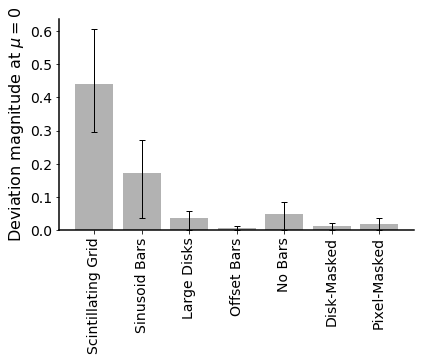

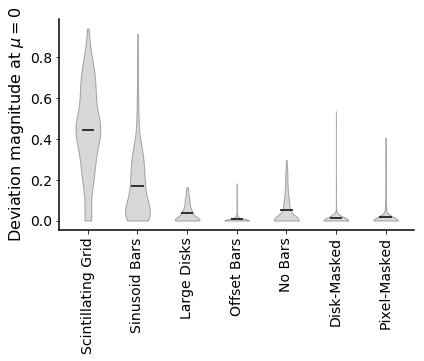

p-values compared to SG:
3.8555068474869434e-55
5.807376298712039e-97
1.4970941990944412e-115
1.4942188111322537e-96
3.218942667854586e-119
9.55052924520822e-114


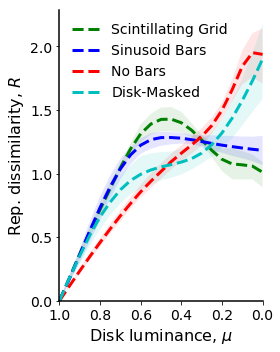

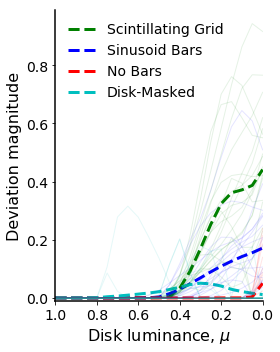

In [7]:
# Scintillating Grid
sg_filepath = 'Data\\vgg19\\MATLAB_vgg19L2_white_to_black__SG'

# No Lines Control
nl_filepath = 'Data\\vgg19\\MATLAB_vgg19L2_white_to_black__SG_NoLinesControl'

# Offset Lines Control
ol_filepath = 'Data\\vgg19\\MATLAB_vgg19L2_white_to_black__SG_OffsetLinesControl'

# Sinusoidal Lines Control
sl_filepath = 'Data\\vgg19\\MATLAB_vgg19L2_white_to_black__SG_SineLinesControl'

# Natural Image Masked Pixel
np_filepath = 'Data\\vgg19\\MATLAB_vgg19L2_white_to_black__image_maskpixels'

# Natural Image Masked Dots
nd_filepath = 'Data\\vgg19\\MATLAB_vgg19L2_white_to_black__image_maskdots'

# Large Dots
ld_filepath = 'Data\\vgg19\\MoreControls_vgg19\\MATLAB_vgg19_fc8L2_1to0__SG_LargeDotsControl'


# more "reduced" controls"
r1_filepath = 'Data\\vgg19\\MoreControls_vgg19\\MATLAB_vgg19_fc8L2_1to0__SG_BlueBkdControl'
r2_filepath = 'Data\\vgg19\\MoreControls_vgg19\\MATLAB_vgg19_fc8L2_1to0__SG_GreenBkdControl'
r3_filepath = 'Data\\vgg19\\MoreControls_vgg19\\MATLAB_vgg19_fc8L2_1to0__SG_RedBkdControl'

# Read data in as Numpy arrays
sg_mat = np.genfromtxt(sg_filepath, delimiter=',')
nl_mat = np.genfromtxt(nl_filepath, delimiter=',')
ol_mat = np.genfromtxt(ol_filepath, delimiter=',')
sl_mat = np.genfromtxt(sl_filepath, delimiter=',')
np_mat = np.genfromtxt(np_filepath, delimiter=',')
nd_mat = np.genfromtxt(nd_filepath, delimiter=',')
ld_mat = np.genfromtxt(ld_filepath, delimiter=',')

r1_mat = np.genfromtxt(r1_filepath, delimiter=',')
r2_mat = np.genfromtxt(r2_filepath, delimiter=',')
r3_mat = np.genfromtxt(r3_filepath, delimiter=',')
r_mat = np.vstack([ol_mat,sl_mat,ld_mat])


# Make reduced and control sets
R_mat = np.vstack([ol_mat,sl_mat,ld_mat])
C_mat = np.vstack([nl_mat,np_mat,nd_mat])

# Get Non-monotonicity measurements
sg_nms = Score_NonMonotonic(sg_mat, norm=True)
nl_nms = Score_NonMonotonic(nl_mat, norm=True)
ol_nms = Score_NonMonotonic(ol_mat, norm=True)
sl_nms = Score_NonMonotonic(sl_mat, norm=True)
np_nms = Score_NonMonotonic(np_mat, norm=True)
nd_nms = Score_NonMonotonic(nd_mat, norm=True)
ld_nms = Score_NonMonotonic(ld_mat, norm=True)

R_nms = Score_NonMonotonic(R_mat, norm=True)
C_nms = Score_NonMonotonic(C_mat, norm=True)

r_nms = Score_NonMonotonic(r_mat, norm=True)

# Make bar plot figure

sg_scores = sg_nms[:,-1]
nl_scores = nl_nms[:,-1]
ol_scores = ol_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]
ld_scores = ld_nms[:,-1]

plt.figure(figsize=(6,5))
plt.bar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k', alpha=0.3)
plt.errorbar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k',
             yerr=([np.mean(sg_scores)-np.percentile(sg_scores,25), np.mean(sl_scores)-np.percentile(sl_scores,25), np.mean(ld_scores)-np.percentile(ld_scores,25), np.mean(ol_scores)-np.percentile(ol_scores,25), np.mean(nl_scores)-np.percentile(nl_scores,25), np.mean(nd_scores)-np.percentile(nd_scores,25), np.mean(np_scores)-np.percentile(np_scores,25)],
                   [np.abs(np.mean(sg_scores)-np.percentile(sg_scores,75)), np.abs(np.mean(sl_scores)-np.percentile(sl_scores,75)), np.abs(np.mean(ld_scores)-np.percentile(ld_scores,75)), np.abs(np.mean(ol_scores)-np.percentile(ol_scores,75)), np.abs(np.mean(nl_scores)-np.percentile(nl_scores,75)), np.abs(np.mean(nd_scores)-np.percentile(nd_scores,75)), np.abs(np.mean(np_scores)-np.percentile(np_scores,75))]),
        ecolor='k', capsize=3, elinewidth=1, linewidth=0)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating Grid', 'Sinusoid Bars', 'Large Disks', 'Offset Bars', 'No Bars', 'Disk-Masked', 'Pixel-Masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_WtoB_L2_dev_monotonic.png', dpi=800)
plt.show()

# violin plot
plt.figure(figsize=(6,5))
fig = plt.violinplot([sg_scores, sl_scores, ld_scores, ol_scores, nl_scores, nd_scores, np_scores],showmeans=True,showextrema=False)
fig['cmeans'].set_color('k')
for pc in fig['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating Grid', 'Sinusoid Bars', 'Large Disks', 'Offset Bars', 'No Bars', 'Disk-Masked', 'Pixel-Masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_WtoB_L2_dev_monotonic_violin.png', dpi=800)
plt.show()
#####


# Make bar plot figure

sg_scores = sg_nms[:,-1]
r_scores = r_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]

# P-values from Mann-Whitney (Wilcoxon)
print ('p-values compared to SG:')
from scipy.stats import mannwhitneyu
T, p = mannwhitneyu(sg_scores, sl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ld_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ol_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nd_scores)
print (p)
T, p = mannwhitneyu(sg_scores, np_scores)
print (p)


# Make plot of representational dissimiarities
plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_mat, axis=0),'g--', linewidth=3.0,label='Scintillating Grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_mat, axis=0),'b--', linewidth=3.0,label='Sinusoid Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_mat, axis=0),'r--', linewidth=3.0,label='No Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_mat, axis=0),'c--', linewidth=3.0,label='Disk-Masked')



colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_mat, sl_mat, nl_mat, nd_mat]):
    #sems = np.std(mat, axis=0)
    #lower = np.mean(mat, axis=0) - sems
    #upper = np.mean(mat, axis=0) + sems
    lower = np.percentile(mat, 25, axis=0)
    upper = np.percentile(mat, 75, axis=0)
    plt.fill_between(np.arange(0,1.05,0.05)[::-1],lower, upper, facecolor=colors[j], alpha=0.1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Rep. dissimilarity, $R$', fontsize=16)
plt.ylim(0,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_WtoB_L2_R_curves.png',dpi=800)
plt.show()

# Make plot of non-monotonic model correlate measurements

num_randoms_to_show = 20

plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_nms, axis=0),'g--', linewidth=3.0,label='Scintillating Grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_nms, axis=0),'b--', linewidth=3.0,label='Sinusoid Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_nms, axis=0),'r--', linewidth=3.0,label='No Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_nms, axis=0),'c--', linewidth=3.0,label='Disk-Masked')


colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_nms, sl_nms, nl_nms, nd_nms]):
    randoms = np.random.randint(0,mat.shape[0],num_randoms_to_show)
    for rdm in randoms:
        plt.plot(np.arange(0,1.05,0.05)[::-1],mat[rdm,:],color=colors[j],linewidth=1.0,alpha=0.1)
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Deviation magnitude', fontsize=16)
plt.ylim(-0.01,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_WtoB_L2_NM_curves.png',dpi=800)
plt.show()

#### ResNet101 White to Black

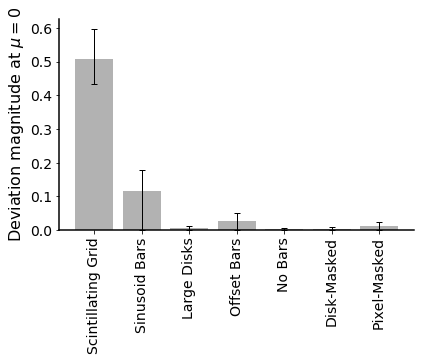

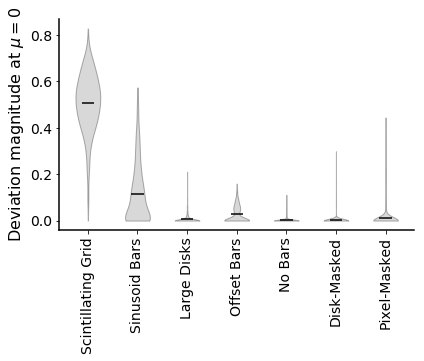

p-values compared to SG:
8.30240041814108e-110
1.3942630947590718e-130
3.542249018184274e-125
1.819160988226515e-134
1.4062902657148112e-138
5.34905903970054e-135


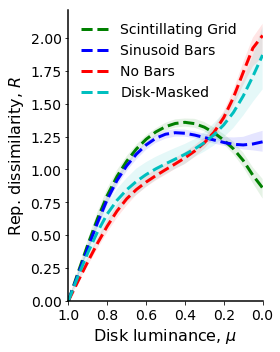

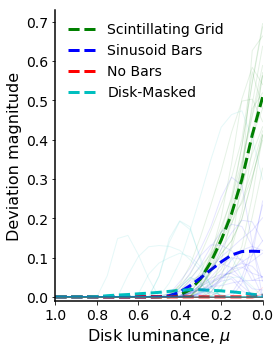

In [8]:
# Scintillating Grid
sg_filepath = 'Data\\resnet101\\MATLAB_resnet101L1_white_to_black__SG'

# No Lines Control
nl_filepath = 'Data\\resnet101\\MATLAB_resnet101L1_white_to_black__SG_NoLinesControl'

# Offset Lines Control
ol_filepath = 'Data\\resnet101\\MATLAB_resnet101L1_white_to_black__SG_OffsetLinesControl'

# Sinusoidal Lines Control
sl_filepath = 'Data\\resnet101\\MATLAB_resnet101L1_white_to_black__SG_SineLinesControl'

# Natural Image Masked Pixel
np_filepath = 'Data\\resnet101\\MATLAB_resnet101L1_white_to_black__image_maskpixels'

# Natural Image Masked Dots
nd_filepath = 'Data\\resnet101\\MATLAB_resnet101L1_white_to_black__image_maskdots'

# Large Dots
ld_filepath = 'Data\\resnet101\\MoreControls_resnet101\\MATLAB_resnet101_fc1000L1_1to0__SG_LargeDotsControl'



# more "reduced" controls"
r1_filepath = 'Data\\resnet101\\MoreControls_resnet101\\MATLAB_resnet101_fc1000L1_1to0__SG_BlueBkdControl'
r2_filepath = 'Data\\resnet101\\MoreControls_resnet101\\MATLAB_resnet101_fc1000L1_1to0__SG_GreenBkdControl'
r3_filepath = 'Data\\resnet101\\MoreControls_resnet101\\MATLAB_resnet101_fc1000L1_1to0__SG_RedBkdControl'

# Read data in as Numpy arrays
sg_mat = np.genfromtxt(sg_filepath, delimiter=',')
nl_mat = np.genfromtxt(nl_filepath, delimiter=',')
ol_mat = np.genfromtxt(ol_filepath, delimiter=',')
sl_mat = np.genfromtxt(sl_filepath, delimiter=',')
np_mat = np.genfromtxt(np_filepath, delimiter=',')
nd_mat = np.genfromtxt(nd_filepath, delimiter=',')
ld_mat = np.genfromtxt(ld_filepath, delimiter=',')

r1_mat = np.genfromtxt(r1_filepath, delimiter=',')
r2_mat = np.genfromtxt(r2_filepath, delimiter=',')
r3_mat = np.genfromtxt(r3_filepath, delimiter=',')
r_mat = np.vstack([ol_mat,sl_mat,ld_mat])


# Make reduced and control sets
R_mat = np.vstack([ol_mat,sl_mat,ld_mat])
C_mat = np.vstack([nl_mat,np_mat,nd_mat])

# Get Non-monotonicity measurements
sg_nms = Score_NonMonotonic(sg_mat, norm=True)
nl_nms = Score_NonMonotonic(nl_mat, norm=True)
ol_nms = Score_NonMonotonic(ol_mat, norm=True)
sl_nms = Score_NonMonotonic(sl_mat, norm=True)
np_nms = Score_NonMonotonic(np_mat, norm=True)
nd_nms = Score_NonMonotonic(nd_mat, norm=True)
ld_nms = Score_NonMonotonic(ld_mat, norm=True)

R_nms = Score_NonMonotonic(R_mat, norm=True)
C_nms = Score_NonMonotonic(C_mat, norm=True)

r_nms = Score_NonMonotonic(r_mat, norm=True)

# Make bar plot figure

sg_scores = sg_nms[:,-1]
nl_scores = nl_nms[:,-1]
ol_scores = ol_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]
ld_scores = ld_nms[:,-1]

plt.figure(figsize=(6,5))
plt.bar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k', alpha=0.3)
plt.errorbar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k',
             yerr=([np.mean(sg_scores)-np.percentile(sg_scores,25), np.mean(sl_scores)-np.percentile(sl_scores,25), np.mean(ld_scores)-np.percentile(ld_scores,25), np.mean(ol_scores)-np.percentile(ol_scores,25), np.mean(nl_scores)-np.percentile(nl_scores,25), np.mean(nd_scores)-np.percentile(nd_scores,25), np.mean(np_scores)-np.percentile(np_scores,25)],
                   [np.abs(np.mean(sg_scores)-np.percentile(sg_scores,75)), np.abs(np.mean(sl_scores)-np.percentile(sl_scores,75)), np.abs(np.mean(ld_scores)-np.percentile(ld_scores,75)), np.abs(np.mean(ol_scores)-np.percentile(ol_scores,75)), np.abs(np.mean(nl_scores)-np.percentile(nl_scores,75)), np.abs(np.mean(nd_scores)-np.percentile(nd_scores,75)), np.abs(np.mean(np_scores)-np.percentile(np_scores,75))]),
        ecolor='k', capsize=3, elinewidth=1, linewidth=0)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating Grid', 'Sinusoid Bars', 'Large Disks', 'Offset Bars', 'No Bars', 'Disk-Masked', 'Pixel-Masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_WtoB_resnet_L1_dev_monotonic.png', dpi=800)
plt.show()


# violin plot
plt.figure(figsize=(6,5))
fig = plt.violinplot([sg_scores, sl_scores, ld_scores, ol_scores, nl_scores, nd_scores, np_scores],showmeans=True,showextrema=False)
fig['cmeans'].set_color('k')
for pc in fig['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating Grid', 'Sinusoid Bars', 'Large Disks', 'Offset Bars', 'No Bars', 'Disk-Masked', 'Pixel-Masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_WtoB_resnet_L1_dev_monotonic_violin.png', dpi=800)
plt.show()
#####

# Make bar plot figure

sg_scores = sg_nms[:,-1]
r_scores = r_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]

# P-values from Mann-Whitney (Wilcoxon)
print ('p-values compared to SG:')
from scipy.stats import mannwhitneyu
T, p = mannwhitneyu(sg_scores, sl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ld_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ol_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nd_scores)
print (p)
T, p = mannwhitneyu(sg_scores, np_scores)
print (p)


# Make plot of representational dissimiarities
plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_mat, axis=0),'g--', linewidth=3.0,label='Scintillating Grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_mat, axis=0),'b--', linewidth=3.0,label='Sinusoid Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_mat, axis=0),'r--', linewidth=3.0,label='No Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_mat, axis=0),'c--', linewidth=3.0,label='Disk-Masked')



colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_mat, sl_mat, nl_mat, nd_mat]):
    #sems = np.std(mat, axis=0)
    #lower = np.mean(mat, axis=0) - sems
    #upper = np.mean(mat, axis=0) + sems
    lower = np.percentile(mat, 25, axis=0)
    upper = np.percentile(mat, 75, axis=0)
    plt.fill_between(np.arange(0,1.05,0.05)[::-1],lower, upper, facecolor=colors[j], alpha=0.1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Rep. dissimilarity, $R$', fontsize=16)
plt.ylim(0,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_WtoB_resnet_L1_R_curves.png',dpi=800)
plt.show()

# Make plot of non-monotonic model correlate measurements

num_randoms_to_show = 20

plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_nms, axis=0),'g--', linewidth=3.0,label='Scintillating Grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_nms, axis=0),'b--', linewidth=3.0,label='Sinusoid Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_nms, axis=0),'r--', linewidth=3.0,label='No Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_nms, axis=0),'c--', linewidth=3.0,label='Disk-Masked')


colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_nms, sl_nms, nl_nms, nd_nms]):
    randoms = np.random.randint(0,mat.shape[0],num_randoms_to_show)
    for rdm in randoms:
        plt.plot(np.arange(0,1.05,0.05)[::-1],mat[rdm,:],color=colors[j],linewidth=1.0,alpha=0.1)
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Deviation magnitude', fontsize=16)
plt.ylim(-0.01,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_WtoB_resnet_L1_NM_curves.png',dpi=800)
plt.show()

## Scrambled VGG-19 Weights

Expect to see that scarmbled weights makes all of them about the same -- some weird patterns but overall ok...

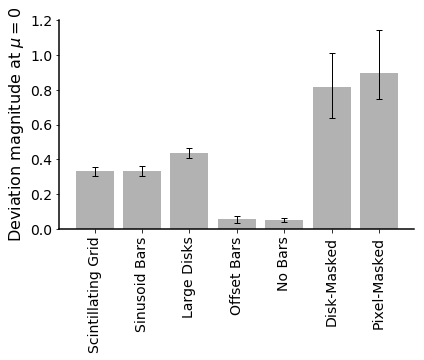

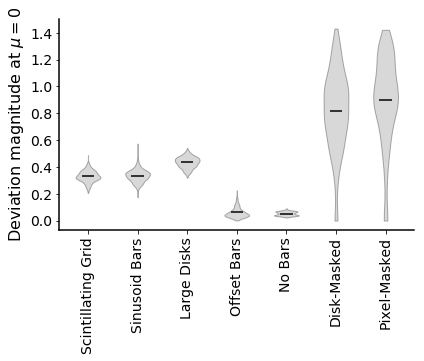

p-values compared to SG:
0.08673328734959002
9.922382005490389e-105
1.8127168002048935e-124
1.75560542771867e-124
5.655970893857349e-97
1.2345973985369823e-92


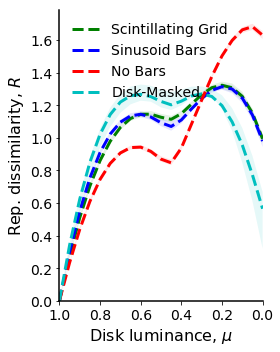

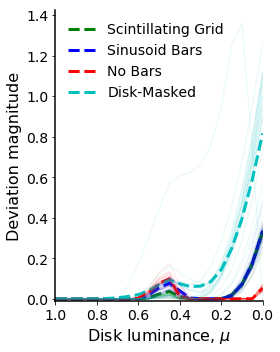

In [9]:
# Scintillating Grid
sg_filepath = 'Data\\vgg19_randomize_weights_control\\MATLAB_vgg19_rand_within_layer_fc8L1_1to0__SG'

# No Lines Control
nl_filepath = 'Data\\vgg19_randomize_weights_control\\MATLAB_vgg19_rand_within_layer_fc8L1_1to0__SG_NoLinesControl'

# Offset Lines Control
ol_filepath = 'Data\\vgg19_randomize_weights_control\\MATLAB_vgg19_rand_within_layer_fc8L1_1to0__SG_OffsetLinesControl'

# Sinusoidal Lines Control
sl_filepath = 'Data\\vgg19_randomize_weights_control\\MATLAB_vgg19_rand_within_layer_fc8L1_1to0__SG_SineLinesControl'

# Natural Image Masked Pixel
np_filepath = 'Data\\vgg19_randomize_weights_control\\MATLAB_vgg19_rand_within_layer_fc8L1_1to0__image_maskpixels'

# Natural Image Masked Dots
nd_filepath = 'Data\\vgg19_randomize_weights_control\\MATLAB_vgg19_rand_within_layer_fc8L1_1to0__image_maskdots'

# Large Dots
ld_filepath = 'Data\\vgg19_randomize_weights_control\\MATLAB_vgg19_rand_within_layer_fc8L1_1to0__SG_LargeDotsControl'


# more "reduced" controls"
r1_filepath = 'Data\\vgg19_randomize_weights_control\\MATLAB_vgg19_rand_within_layer_fc8L1_1to0__SG_BlueBkdControl'
r2_filepath = 'Data\\vgg19_randomize_weights_control\\MATLAB_vgg19_rand_within_layer_fc8L1_1to0__SG_GreenBkdControl'
r3_filepath = 'Data\\vgg19_randomize_weights_control\\MATLAB_vgg19_rand_within_layer_fc8L1_1to0__SG_RedBkdControl'

# Read data in as Numpy arrays
sg_mat = np.genfromtxt(sg_filepath, delimiter=',')
nl_mat = np.genfromtxt(nl_filepath, delimiter=',')
ol_mat = np.genfromtxt(ol_filepath, delimiter=',')
sl_mat = np.genfromtxt(sl_filepath, delimiter=',')
np_mat = np.genfromtxt(np_filepath, delimiter=',')
nd_mat = np.genfromtxt(nd_filepath, delimiter=',')
ld_mat = np.genfromtxt(ld_filepath, delimiter=',')

r1_mat = np.genfromtxt(r1_filepath, delimiter=',')
r2_mat = np.genfromtxt(r2_filepath, delimiter=',')
r3_mat = np.genfromtxt(r3_filepath, delimiter=',')
r_mat = np.vstack([ol_mat,sl_mat,ld_mat])


# Make reduced and control sets
R_mat = np.vstack([ol_mat,sl_mat,ld_mat])
C_mat = np.vstack([nl_mat,np_mat,nd_mat])

# Get Non-monotonicity measurements
sg_nms = Score_NonMonotonic(sg_mat, norm=True)
nl_nms = Score_NonMonotonic(nl_mat, norm=True)
ol_nms = Score_NonMonotonic(ol_mat, norm=True)
sl_nms = Score_NonMonotonic(sl_mat, norm=True)
np_nms = Score_NonMonotonic(np_mat, norm=True)
nd_nms = Score_NonMonotonic(nd_mat, norm=True)
ld_nms = Score_NonMonotonic(ld_mat, norm=True)

R_nms = Score_NonMonotonic(R_mat, norm=True)
C_nms = Score_NonMonotonic(C_mat, norm=True)

r_nms = Score_NonMonotonic(r_mat, norm=True)

# Make bar plot figure

sg_scores = sg_nms[:,-1]
nl_scores = nl_nms[:,-1]
ol_scores = ol_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]
ld_scores = ld_nms[:,-1]

plt.figure(figsize=(6,5))
plt.bar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k', alpha=0.3)
plt.errorbar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k',
             yerr=([np.mean(sg_scores)-np.percentile(sg_scores,25), np.mean(sl_scores)-np.percentile(sl_scores,25), np.mean(ld_scores)-np.percentile(ld_scores,25), np.mean(ol_scores)-np.percentile(ol_scores,25), np.mean(nl_scores)-np.percentile(nl_scores,25), np.mean(nd_scores)-np.percentile(nd_scores,25), np.mean(np_scores)-np.percentile(np_scores,25)],
                   [np.abs(np.mean(sg_scores)-np.percentile(sg_scores,75)), np.abs(np.mean(sl_scores)-np.percentile(sl_scores,75)), np.abs(np.mean(ld_scores)-np.percentile(ld_scores,75)), np.abs(np.mean(ol_scores)-np.percentile(ol_scores,75)), np.abs(np.mean(nl_scores)-np.percentile(nl_scores,75)), np.abs(np.mean(nd_scores)-np.percentile(nd_scores,75)), np.abs(np.mean(np_scores)-np.percentile(np_scores,75))]),
        ecolor='k', capsize=3, elinewidth=1, linewidth=0)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating Grid', 'Sinusoid Bars', 'Large Disks', 'Offset Bars', 'No Bars', 'Disk-Masked', 'Pixel-Masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_vgg19scrambled_WtoB_L1_dev_monotonic.png', dpi=800)
plt.show()


# violin plot
plt.figure(figsize=(6,5))
fig = plt.violinplot([sg_scores, sl_scores, ld_scores, ol_scores, nl_scores, nd_scores, np_scores],showmeans=True,showextrema=False)
fig['cmeans'].set_color('k')
for pc in fig['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating Grid', 'Sinusoid Bars', 'Large Disks', 'Offset Bars', 'No Bars', 'Disk-Masked', 'Pixel-Masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_vgg19scrambled_WtoB_L1_dev_monotonic_violin.png', dpi=800)
plt.show()
#####


# Make bar plot figure

sg_scores = sg_nms[:,-1]
r_scores = r_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]

# P-values from Mann-Whitney (Wilcoxon)
print ('p-values compared to SG:')
from scipy.stats import mannwhitneyu
T, p = mannwhitneyu(sg_scores, sl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ld_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ol_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nd_scores)
print (p)
T, p = mannwhitneyu(sg_scores, np_scores)
print (p)


# Make plot of representational dissimiarities
plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_mat, axis=0),'g--', linewidth=3.0,label='Scintillating Grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_mat, axis=0),'b--', linewidth=3.0,label='Sinusoid Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_mat, axis=0),'r--', linewidth=3.0,label='No Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_mat, axis=0),'c--', linewidth=3.0,label='Disk-Masked')



colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_mat, sl_mat, nl_mat, nd_mat]):
    #sems = np.std(mat, axis=0)
    #lower = np.mean(mat, axis=0) - sems
    #upper = np.mean(mat, axis=0) + sems
    lower = np.percentile(mat, 25, axis=0)
    upper = np.percentile(mat, 75, axis=0)
    plt.fill_between(np.arange(0,1.05,0.05)[::-1],lower, upper, facecolor=colors[j], alpha=0.1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Rep. dissimilarity, $R$', fontsize=16)
plt.ylim(0,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_vgg19scrambled_WtoB_L1_R_curves.png',dpi=800)
plt.show()

# Make plot of non-monotonic model correlate measurements

num_randoms_to_show = 20

plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_nms, axis=0),'g--', linewidth=3.0,label='Scintillating Grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_nms, axis=0),'b--', linewidth=3.0,label='Sinusoid Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_nms, axis=0),'r--', linewidth=3.0,label='No Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_nms, axis=0),'c--', linewidth=3.0,label='Disk-Masked')


colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_nms, sl_nms, nl_nms, nd_nms]):
    randoms = np.random.randint(0,mat.shape[0],num_randoms_to_show)
    for rdm in randoms:
        plt.plot(np.arange(0,1.05,0.05)[::-1],mat[rdm,:],color=colors[j],linewidth=1.0,alpha=0.1)
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Deviation magnitude', fontsize=16)
plt.ylim(-0.01,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_vgg19scrambled_WtoB_L1_NM_curves.png',dpi=800)
plt.show()

## No Border

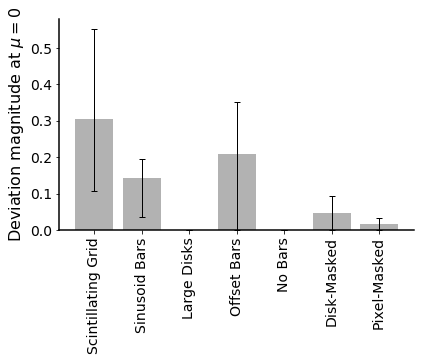

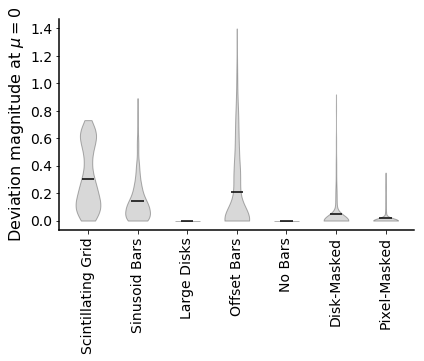

p-values compared to SG:
1.6754548042973025e-25
9.163641778861669e-133
4.1015129557255536e-19
9.163641778861669e-133
4.310763005160966e-87
6.179670778736418e-109


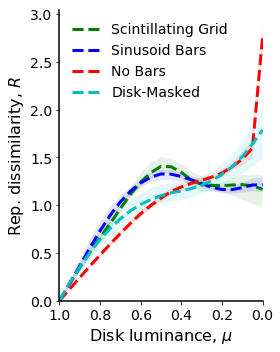

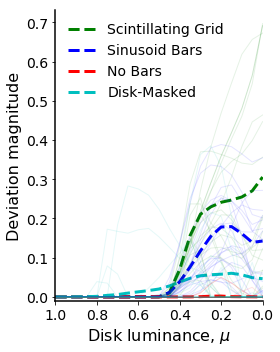

In [10]:
# Scintillating Grid
sg_filepath = 'Data\\vgg19_all_NoBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG'

# No Lines Control
nl_filepath = 'Data\\vgg19_all_NoBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_NoLinesControl'

# Offset Lines Control
ol_filepath = 'Data\\vgg19_all_NoBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_OffsetLinesControl'

# Sinusoidal Lines Control
sl_filepath = 'Data\\vgg19_all_NoBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_SineLinesControl'

# Natural Image Masked Pixel
np_filepath = 'Data\\vgg19_all_NoBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__image_maskpixels'

# Natural Image Masked Dots
nd_filepath = 'Data\\vgg19_all_NoBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__image_maskdots'

# Large Dots
ld_filepath = 'Data\\vgg19_all_NoBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_LargeDotsControl'


# Read data in as Numpy arrays
sg_mat = np.genfromtxt(sg_filepath, delimiter=',')
nl_mat = np.genfromtxt(nl_filepath, delimiter=',')
ol_mat = np.genfromtxt(ol_filepath, delimiter=',')
sl_mat = np.genfromtxt(sl_filepath, delimiter=',')
np_mat = np.genfromtxt(np_filepath, delimiter=',')
nd_mat = np.genfromtxt(nd_filepath, delimiter=',')
ld_mat = np.genfromtxt(ld_filepath, delimiter=',')

# Make reduced and control sets
R_mat = np.vstack([ol_mat,sl_mat,ld_mat])
C_mat = np.vstack([nl_mat,np_mat,nd_mat])

# Get Non-monotonicity measurements
sg_nms = Score_NonMonotonic(sg_mat, norm=True)
nl_nms = Score_NonMonotonic(nl_mat, norm=True)
ol_nms = Score_NonMonotonic(ol_mat, norm=True)
sl_nms = Score_NonMonotonic(sl_mat, norm=True)
np_nms = Score_NonMonotonic(np_mat, norm=True)
nd_nms = Score_NonMonotonic(nd_mat, norm=True)
ld_nms = Score_NonMonotonic(ld_mat, norm=True)

R_nms = Score_NonMonotonic(R_mat, norm=True)
C_nms = Score_NonMonotonic(C_mat, norm=True)

# Make bar plot figure

sg_scores = sg_nms[:,-1]
nl_scores = nl_nms[:,-1]
ol_scores = ol_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]
ld_scores = ld_nms[:,-1]

plt.figure(figsize=(6,5))
plt.bar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k', alpha=0.3)
plt.errorbar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k',
             yerr=([np.mean(sg_scores)-np.percentile(sg_scores,25), np.mean(sl_scores)-np.percentile(sl_scores,25), np.mean(ld_scores)-np.percentile(ld_scores,25), np.mean(ol_scores)-np.percentile(ol_scores,25), np.mean(nl_scores)-np.percentile(nl_scores,25), np.mean(nd_scores)-np.percentile(nd_scores,25), np.mean(np_scores)-np.percentile(np_scores,25)],
                   [np.abs(np.mean(sg_scores)-np.percentile(sg_scores,75)), np.abs(np.mean(sl_scores)-np.percentile(sl_scores,75)), np.abs(np.mean(ld_scores)-np.percentile(ld_scores,75)), np.abs(np.mean(ol_scores)-np.percentile(ol_scores,75)), np.abs(np.mean(nl_scores)-np.percentile(nl_scores,75)), np.abs(np.mean(nd_scores)-np.percentile(nd_scores,75)), np.abs(np.mean(np_scores)-np.percentile(np_scores,75))]),
        ecolor='k', capsize=3, elinewidth=1, linewidth=0)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating Grid', 'Sinusoid Bars', 'Large Disks', 'Offset Bars', 'No Bars', 'Disk-Masked', 'Pixel-Masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_vgg19NoBorder_WtoB_L1_dev_monotonic.png', dpi=800)
plt.show()


# violin plot
plt.figure(figsize=(6,5))
fig = plt.violinplot([sg_scores, sl_scores, ld_scores, ol_scores, nl_scores, nd_scores, np_scores],showmeans=True,showextrema=False)
fig['cmeans'].set_color('k')
for pc in fig['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating Grid', 'Sinusoid Bars', 'Large Disks', 'Offset Bars', 'No Bars', 'Disk-Masked', 'Pixel-Masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_vgg19NoBorder_WtoB_L1_dev_monotonic_violin.png', dpi=800)
plt.show()
#####

# Make bar plot figure

sg_scores = sg_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]

# P-values from Mann-Whitney (Wilcoxon)
print ('p-values compared to SG:')
from scipy.stats import mannwhitneyu
T, p = mannwhitneyu(sg_scores, sl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ld_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ol_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nd_scores)
print (p)
T, p = mannwhitneyu(sg_scores, np_scores)
print (p)


# Make plot of representational dissimiarities
plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_mat, axis=0),'g--', linewidth=3.0,label='Scintillating Grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_mat, axis=0),'b--', linewidth=3.0,label='Sinusoid Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_mat, axis=0),'r--', linewidth=3.0,label='No Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_mat, axis=0),'c--', linewidth=3.0,label='Disk-Masked')



colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_mat, sl_mat, nl_mat, nd_mat]):
    #sems = np.std(mat, axis=0)
    #lower = np.mean(mat, axis=0) - sems
    #upper = np.mean(mat, axis=0) + sems
    lower = np.percentile(mat, 25, axis=0)
    upper = np.percentile(mat, 75, axis=0)
    plt.fill_between(np.arange(0,1.05,0.05)[::-1],lower, upper, facecolor=colors[j], alpha=0.1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Rep. dissimilarity, $R$', fontsize=16)
plt.ylim(0,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_vgg19NoBorder_WtoB_L1_R_curves.png',dpi=800)
plt.show()

# Make plot of non-monotonic model correlate measurements

num_randoms_to_show = 20

plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_nms, axis=0),'g--', linewidth=3.0,label='Scintillating Grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_nms, axis=0),'b--', linewidth=3.0,label='Sinusoid Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_nms, axis=0),'r--', linewidth=3.0,label='No Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_nms, axis=0),'c--', linewidth=3.0,label='Disk-Masked')


colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_nms, sl_nms, nl_nms, nd_nms]):
    randoms = np.random.randint(0,mat.shape[0],num_randoms_to_show)
    for rdm in randoms:
        plt.plot(np.arange(0,1.05,0.05)[::-1],mat[rdm,:],color=colors[j],linewidth=1.0,alpha=0.1)
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Deviation magnitude', fontsize=16)
plt.ylim(-0.01,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_vgg19NoBorder_WtoB_L1_NM_curves.png',dpi=800)
plt.show()

### 2X Border

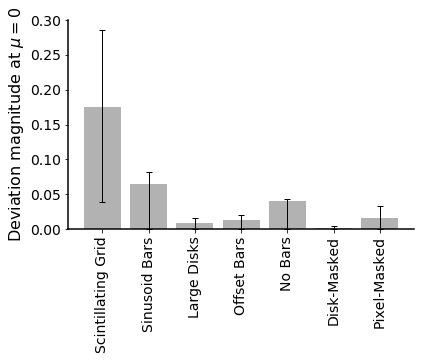

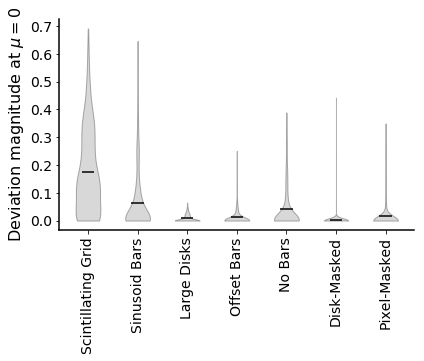

p-values compared to SG:
1.0972023485146952e-30
6.481967962031009e-69
6.370990932207314e-74
1.9589975255982882e-47
4.445224208151377e-106
3.1318442459854194e-80


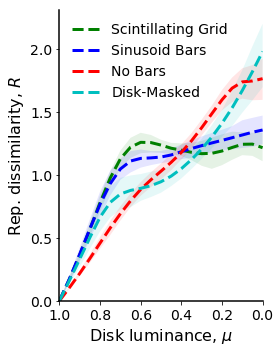

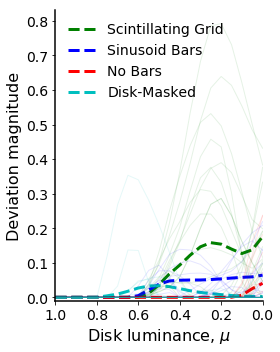

In [11]:
# Scintillating Grid
sg_filepath = 'Data\\vgg19_all_DoubleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG'

# No Lines Control
nl_filepath = 'Data\\vgg19_all_DoubleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_NoLinesControl'

# Offset Lines Control
ol_filepath = 'Data\\vgg19_all_DoubleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_OffsetLinesControl'

# Sinusoidal Lines Control
sl_filepath = 'Data\\vgg19_all_DoubleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_SineLinesControl'

# Natural Image Masked Pixel
np_filepath = 'Data\\vgg19_all_DoubleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__image_maskpixels'

# Natural Image Masked Dots
nd_filepath = 'Data\\vgg19_all_DoubleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__image_maskdots'

# Large Dots
ld_filepath = 'Data\\vgg19_all_DoubleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_LargeDotsControl'


# Read data in as Numpy arrays
sg_mat = np.genfromtxt(sg_filepath, delimiter=',')
nl_mat = np.genfromtxt(nl_filepath, delimiter=',')
ol_mat = np.genfromtxt(ol_filepath, delimiter=',')
sl_mat = np.genfromtxt(sl_filepath, delimiter=',')
np_mat = np.genfromtxt(np_filepath, delimiter=',')
nd_mat = np.genfromtxt(nd_filepath, delimiter=',')
ld_mat = np.genfromtxt(ld_filepath, delimiter=',')

# Make reduced and control sets
R_mat = np.vstack([ol_mat,sl_mat,ld_mat])
C_mat = np.vstack([nl_mat,np_mat,nd_mat])

# Get Non-monotonicity measurements
sg_nms = Score_NonMonotonic(sg_mat, norm=True)
nl_nms = Score_NonMonotonic(nl_mat, norm=True)
ol_nms = Score_NonMonotonic(ol_mat, norm=True)
sl_nms = Score_NonMonotonic(sl_mat, norm=True)
np_nms = Score_NonMonotonic(np_mat, norm=True)
nd_nms = Score_NonMonotonic(nd_mat, norm=True)
ld_nms = Score_NonMonotonic(ld_mat, norm=True)

R_nms = Score_NonMonotonic(R_mat, norm=True)
C_nms = Score_NonMonotonic(C_mat, norm=True)


# Make bar plot figure

sg_scores = sg_nms[:,-1]
nl_scores = nl_nms[:,-1]
ol_scores = ol_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]
ld_scores = ld_nms[:,-1]

plt.figure(figsize=(6,5))
plt.bar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k', alpha=0.3)
plt.errorbar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k',
             yerr=([np.mean(sg_scores)-np.percentile(sg_scores,25), np.mean(sl_scores)-np.percentile(sl_scores,25), np.mean(ld_scores)-np.percentile(ld_scores,25), np.mean(ol_scores)-np.percentile(ol_scores,25), np.mean(nl_scores)-np.percentile(nl_scores,25), np.mean(nd_scores)-np.percentile(nd_scores,25), np.mean(np_scores)-np.percentile(np_scores,25)],
                   [np.abs(np.mean(sg_scores)-np.percentile(sg_scores,75)), np.abs(np.mean(sl_scores)-np.percentile(sl_scores,75)), np.abs(np.mean(ld_scores)-np.percentile(ld_scores,75)), np.abs(np.mean(ol_scores)-np.percentile(ol_scores,75)), np.abs(np.mean(nl_scores)-np.percentile(nl_scores,75)), np.abs(np.mean(nd_scores)-np.percentile(nd_scores,75)), np.abs(np.mean(np_scores)-np.percentile(np_scores,75))]),
        ecolor='k', capsize=3, elinewidth=1, linewidth=0)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating Grid', 'Sinusoid Bars', 'Large Disks', 'Offset Bars', 'No Bars', 'Disk-Masked', 'Pixel-Masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_vgg192XBorder_WtoB_L1_dev_monotonic.png', dpi=800)
plt.show()


# violin plot
plt.figure(figsize=(6,5))
fig = plt.violinplot([sg_scores, sl_scores, ld_scores, ol_scores, nl_scores, nd_scores, np_scores],showmeans=True,showextrema=False)
fig['cmeans'].set_color('k')
for pc in fig['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating Grid', 'Sinusoid Bars', 'Large Disks', 'Offset Bars', 'No Bars', 'Disk-Masked', 'Pixel-Masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_vgg192XBorder_WtoB_L1_dev_monotonic_violin.png', dpi=800)
plt.show()
#####


# Make bar plot figure

sg_scores = sg_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]

# P-values from Mann-Whitney (Wilcoxon)
print ('p-values compared to SG:')
from scipy.stats import mannwhitneyu
T, p = mannwhitneyu(sg_scores, sl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ld_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ol_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nd_scores)
print (p)
T, p = mannwhitneyu(sg_scores, np_scores)
print (p)


# Make plot of representational dissimiarities
plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_mat, axis=0),'g--', linewidth=3.0,label='Scintillating Grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_mat, axis=0),'b--', linewidth=3.0,label='Sinusoid Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_mat, axis=0),'r--', linewidth=3.0,label='No Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_mat, axis=0),'c--', linewidth=3.0,label='Disk-Masked')



colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_mat, sl_mat, nl_mat, nd_mat]):
    #sems = np.std(mat, axis=0)
    #lower = np.mean(mat, axis=0) - sems
    #upper = np.mean(mat, axis=0) + sems
    lower = np.percentile(mat, 25, axis=0)
    upper = np.percentile(mat, 75, axis=0)
    plt.fill_between(np.arange(0,1.05,0.05)[::-1],lower, upper, facecolor=colors[j], alpha=0.1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Rep. dissimilarity, $R$', fontsize=16)
plt.ylim(0,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_vgg192XBorder_WtoB_L1_R_curves.png',dpi=800)
plt.show()

# Make plot of non-monotonic model correlate measurements

num_randoms_to_show = 20

plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_nms, axis=0),'g--', linewidth=3.0,label='Scintillating Grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_nms, axis=0),'b--', linewidth=3.0,label='Sinusoid Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_nms, axis=0),'r--', linewidth=3.0,label='No Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_nms, axis=0),'c--', linewidth=3.0,label='Disk-Masked')


colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_nms, sl_nms, nl_nms, nd_nms]):
    randoms = np.random.randint(0,mat.shape[0],num_randoms_to_show)
    for rdm in randoms:
        plt.plot(np.arange(0,1.05,0.05)[::-1],mat[rdm,:],color=colors[j],linewidth=1.0,alpha=0.1)
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Deviation magnitude', fontsize=16)
plt.ylim(-0.01,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_vgg192XBorder_WtoB_L1_NM_curves.png',dpi=800)
plt.show()

### 3X Border

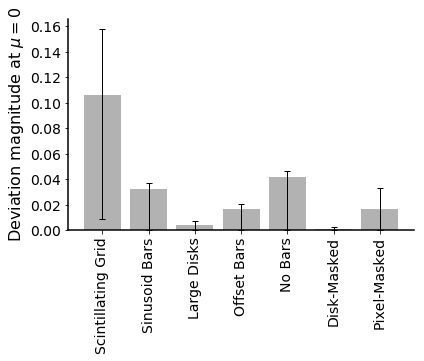

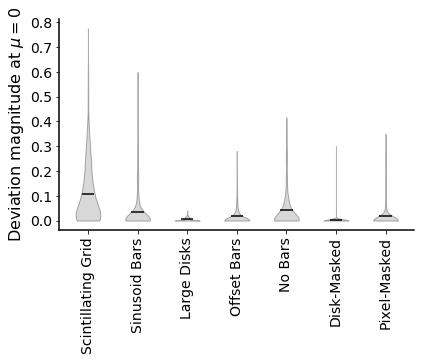

p-values compared to SG:
6.250533800401773e-32
1.525190956407816e-59
5.5363005810742624e-49
4.631148237829599e-24
1.3992655517692439e-98
2.711069959459241e-64


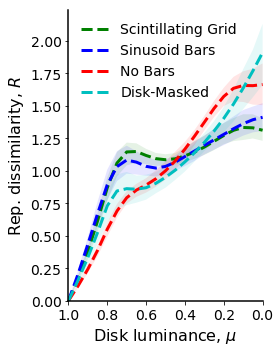

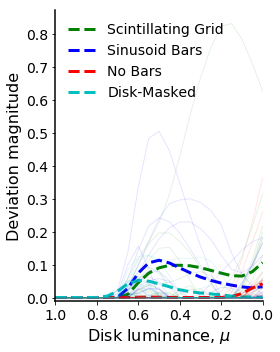

In [12]:
# Scintillating Grid
sg_filepath = 'Data\\vgg19_all_TripleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG'

# No Lines Control
nl_filepath = 'Data\\vgg19_all_TripleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_NoLinesControl'

# Offset Lines Control
ol_filepath = 'Data\\vgg19_all_TripleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_OffsetLinesControl'

# Sinusoidal Lines Control
sl_filepath = 'Data\\vgg19_all_TripleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_SineLinesControl'

# Natural Image Masked Pixel
np_filepath = 'Data\\vgg19_all_TripleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__image_maskpixels'

# Natural Image Masked Dots
nd_filepath = 'Data\\vgg19_all_TripleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__image_maskdots'

# Large Dots
ld_filepath = 'Data\\vgg19_all_TripleSizedBorder\\MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_LargeDotsControl'


# Read data in as Numpy arrays
sg_mat = np.genfromtxt(sg_filepath, delimiter=',')
nl_mat = np.genfromtxt(nl_filepath, delimiter=',')
ol_mat = np.genfromtxt(ol_filepath, delimiter=',')
sl_mat = np.genfromtxt(sl_filepath, delimiter=',')
np_mat = np.genfromtxt(np_filepath, delimiter=',')
nd_mat = np.genfromtxt(nd_filepath, delimiter=',')
ld_mat = np.genfromtxt(ld_filepath, delimiter=',')

# Make reduced and control sets
R_mat = np.vstack([ol_mat,sl_mat,ld_mat])
C_mat = np.vstack([nl_mat,np_mat,nd_mat])

# Get Non-monotonicity measurements
sg_nms = Score_NonMonotonic(sg_mat, norm=True)
nl_nms = Score_NonMonotonic(nl_mat, norm=True)
ol_nms = Score_NonMonotonic(ol_mat, norm=True)
sl_nms = Score_NonMonotonic(sl_mat, norm=True)
np_nms = Score_NonMonotonic(np_mat, norm=True)
nd_nms = Score_NonMonotonic(nd_mat, norm=True)
ld_nms = Score_NonMonotonic(ld_mat, norm=True)

R_nms = Score_NonMonotonic(R_mat, norm=True)
C_nms = Score_NonMonotonic(C_mat, norm=True)

# Make bar plot figure

sg_scores = sg_nms[:,-1]
nl_scores = nl_nms[:,-1]
ol_scores = ol_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]
ld_scores = ld_nms[:,-1]

plt.figure(figsize=(6,5))
plt.bar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k', alpha=0.3)
plt.errorbar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [np.mean(sg_scores), np.mean(sl_scores), np.mean(ld_scores), np.mean(ol_scores), np.mean(nl_scores), np.mean(nd_scores), np.mean(np_scores)], color='k',
             yerr=([np.mean(sg_scores)-np.percentile(sg_scores,25), np.mean(sl_scores)-np.percentile(sl_scores,25), np.mean(ld_scores)-np.percentile(ld_scores,25), np.mean(ol_scores)-np.percentile(ol_scores,25), np.mean(nl_scores)-np.percentile(nl_scores,25), np.mean(nd_scores)-np.percentile(nd_scores,25), np.mean(np_scores)-np.percentile(np_scores,25)],
                   [np.abs(np.mean(sg_scores)-np.percentile(sg_scores,75)), np.abs(np.mean(sl_scores)-np.percentile(sl_scores,75)), np.abs(np.mean(ld_scores)-np.percentile(ld_scores,75)), np.abs(np.mean(ol_scores)-np.percentile(ol_scores,75)), np.abs(np.mean(nl_scores)-np.percentile(nl_scores,75)), np.abs(np.mean(nd_scores)-np.percentile(nd_scores,75)), np.abs(np.mean(np_scores)-np.percentile(np_scores,75))]),
        ecolor='k', capsize=3, elinewidth=1, linewidth=0)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating Grid', 'Sinusoid Bars', 'Large Disks', 'Offset Bars', 'No Bars', 'Disk-Masked', 'Pixel-Masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_vgg193XBorder_WtoB_L1_dev_monotonic.png', dpi=800)
plt.show()

# violin plot
plt.figure(figsize=(6,5))
fig = plt.violinplot([sg_scores, sl_scores, ld_scores, ol_scores, nl_scores, nd_scores, np_scores],showmeans=True,showextrema=False)
fig['cmeans'].set_color('k')
for pc in fig['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ['Scintillating Grid', 'Sinusoid Bars', 'Large Disks', 'Offset Bars', 'No Bars', 'Disk-Masked', 'Pixel-Masked'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_vgg193XBorder_WtoB_L1_dev_monotonic_violin.png', dpi=800)
plt.show()
#####


# Make bar plot figure

sg_scores = sg_nms[:,-1]
sl_scores = sl_nms[:,-1]
np_scores = np_nms[:,-1]
nd_scores = nd_nms[:,-1]

# P-values from Mann-Whitney (Wilcoxon)
print ('p-values compared to SG:')
from scipy.stats import mannwhitneyu
T, p = mannwhitneyu(sg_scores, sl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ld_scores)
print (p)
T, p = mannwhitneyu(sg_scores, ol_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nl_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nd_scores)
print (p)
T, p = mannwhitneyu(sg_scores, np_scores)
print (p)


# Make plot of representational dissimiarities
plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_mat, axis=0),'g--', linewidth=3.0,label='Scintillating Grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_mat, axis=0),'b--', linewidth=3.0,label='Sinusoid Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_mat, axis=0),'r--', linewidth=3.0,label='No Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_mat, axis=0),'c--', linewidth=3.0,label='Disk-Masked')



colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_mat, sl_mat, nl_mat, nd_mat]):
    #sems = np.std(mat, axis=0)
    #lower = np.mean(mat, axis=0) - sems
    #upper = np.mean(mat, axis=0) + sems
    lower = np.percentile(mat, 25, axis=0)
    upper = np.percentile(mat, 75, axis=0)
    plt.fill_between(np.arange(0,1.05,0.05)[::-1],lower, upper, facecolor=colors[j], alpha=0.1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Rep. dissimilarity, $R$', fontsize=16)
plt.ylim(0,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_vgg193XBorder_WtoB_L1_R_curves.png',dpi=800)
plt.show()

# Make plot of non-monotonic model correlate measurements

num_randoms_to_show = 20

plt.figure(figsize=(4,5))

plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sg_nms, axis=0),'g--', linewidth=3.0,label='Scintillating Grid')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(sl_nms, axis=0),'b--', linewidth=3.0,label='Sinusoid Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nl_nms, axis=0),'r--', linewidth=3.0,label='No Bars')
plt.plot(np.arange(0,1.05,0.05)[::-1],np.mean(nd_nms, axis=0),'c--', linewidth=3.0,label='Disk-Masked')


colors = ['g', 'b', 'r', 'c']
for j, mat in enumerate([sg_nms, sl_nms, nl_nms, nd_nms]):
    randoms = np.random.randint(0,mat.shape[0],num_randoms_to_show)
    for rdm in randoms:
        plt.plot(np.arange(0,1.05,0.05)[::-1],mat[rdm,:],color=colors[j],linewidth=1.0,alpha=0.1)
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Disk luminance, $\mu$', fontsize=16)
plt.ylabel('Deviation magnitude', fontsize=16)
plt.ylim(-0.01,None)
plt.xlim(0,1)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Figures/NEW_vgg193XBorder_WtoB_L1_NM_curves.png',dpi=800)
plt.show()

# Layer Results

In [7]:
def convert_dir_results_to_one_csv (directory_path, save_path, row_idx=62, layer_block=5, tag='L1_1to0__SG', mx=45,
                                   average=False):
    '''
    Converts directory of results (default row_idx=63rd row) with corresponding file tag (default '_SG') into one CSV 
    file organized in the input format of layerScore()
    
    layer_block = idx of the '_' separated block of results file name in which the layer name is found
    mx = deepest layer to record
    
    average = False or True --> if True: override "row_idx" and average over all of the files --> save one *_mean and one
                                         *_std file with the mean and standard deviations
    '''
    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir(directory_path) if isfile(join(directory_path, f))]
    
    layer_names = ['abs_diff_of_means']
    R_values = [np.arange(0,1.05,0.05)]
    R_stds = [np.arange(0,1.05,0.05)]
    
    if average is False:
        for num in np.arange(1,mx+1,1):
            for f in onlyfiles:
                if float(f.split('_')[4])==num: # ordinal numbering filter
                    if tag in f and tag+'_' not in f: # if tag in filename
                        # Get R values in indexed row
                        mat = np.genfromtxt(join(directory_path, f), delimiter=',')
                        row = mat[row_idx,:]
                        R_values.append(np.flipud(row))
                        # Get layer name
                        layer_name = f.split('_')[layer_block].split('L')[0]
                        layer_names.append(layer_name)
        df = pd.DataFrame(np.vstack(R_values).T)
        print ('Found '+str(len(layer_names))+' layers...')
        df.to_csv(save_path+'.csv', header=layer_names, index=False)
        
    else: # for averaging and standard deviations
        for num in np.arange(1,mx+1,1):
            for f in onlyfiles:
                if float(f.split('_')[4])==num: # ordinal numbering filter
                    if tag in f and tag+'_' not in f: # if tag in filename
                        # Get R values in indexed row
                        mat = np.genfromtxt(join(directory_path, f), delimiter=',')
                        means = np.mean(mat, axis=0)
                        stds = np.std(mat, axis=0)
                        R_values.append(np.flipud(means))
                        R_stds.append(np.flipud(stds))
                        # Get layer name
                        layer_name = f.split('_')[layer_block].split('L')[0]
                        layer_names.append(layer_name)
        df = pd.DataFrame(np.vstack(R_values).T)
        print ('Found '+str(len(layer_names))+' layers...')
        df.to_csv(save_path+'_mean.csv', header=layer_names, index=False)
        df = pd.DataFrame(np.vstack(R_stds).T)
        df.to_csv(save_path+'_std.csv', header=layer_names, index=False)

def layerScore (filename):
    '''
    DEPRECATED
    Scores layers using the illusion_metric()
    
    Input CSV file must have the layer names as the columns and the rep dissimilarity values for each layer for white
    to black down each column.
    '''
    imported_file = pd.read_csv('Data/'+filename+'.csv')

    layerNames = list(imported_file.columns.values)
    layerNames = layerNames[2:]

    imported_file = np.genfromtxt('Data/'+filename+'.csv', delimiter = ',')
    imported_file = imported_file.T
    imported_file = imported_file.tolist()

    taskNames = imported_file[0] # records the ordered task names
    del taskNames[0]
    del imported_file[0] # takes out task names before analysis
    del imported_file[0] # also take out 'data' column

    diss_strgs = [] # collects the ordered list of dissimilarity coefficient lists (string default)
    diss_values = [] # float format

    # iterates and append the values
    for row in imported_file:
        diss_strgs.append(row[1:])

    # Converts the default string values to workable floats
    for row in diss_strgs:
        new_row = []
        for str_value in row:
            new_row.append(float(str_value))
        diss_values.append(new_row)        
    
    layer_scores = []
    norm_scores = []

    for layer in diss_values:
        score = get_score (layer, taskNames)
        layer_scores.append(score)
        #norm_scores.append(score/layer[0]) # normalize by first value
        
    # find propagating idx (i.e. shallowest layer where all proceeding layers have score > 0)
    for i in range(len(layerNames)):
        ri = len(layerNames)-1-i
        score = norm_scores[ri]
        if score == 0:
            prop_idx = ri
            break

    # find initial idx (i.e. shallowest layer with score > 0.1)
    for i in range(len(layerNames)):
        score = norm_scores[i]
        if score > 0.1:
            init_idx = i
            break
    
    # Print results
    try:
        print ('Propagating idx: ' + str(layerNames[prop_idx]) + ', ' + str(prop_idx))
    except:
        print ('No propagating idx found.')
    try:
        print ('Initial idx: ' + str(layerNames[init_idx]) + ', ' + str(init_idx))
    except:
        print ('No initial idx found.')
    max_idx = norm_scores.index(max(norm_scores))
    print ('Max idx: ' + str(layerNames[max_idx]) + ', ' + str(max_idx))
    
    return (norm_scores, layerNames)

def get_score (fc8_diss_values, taskNames):
    '''
    DEPRECATED
    '''
    max_val = max(fc8_diss_values)
    index_max = fc8_diss_values.index(max_val)
    # least squares linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(taskNames[index_max:], fc8_diss_values[index_max:])
    end_slope = -slope
    
    ill_diss = []
    blackness_diss = []
    for i, diss_val in enumerate(fc8_diss_values):
        if max(taskNames) <= 1:
            black_contrib = end_slope*(1-taskNames[i])
        else:
            raise Exception ("Still need to add this functionality!")
        blackness_diss.append(black_contrib)
        decomp_diss = black_contrib - diss_val
        ill_diss.append(decomp_diss)
    
    score = illusion_metric(ill_diss)
    
    return (score)

def illusion_metric (task_values):
    '''
    DEPRECATED
    '''
    # Integrates score of illusion over zero (i.e. area between expected and observed curves)
    zeroed_task_vals = []
    for task in task_values:
        if task > 0:
            zeroed_task_vals.append(task)
        else:
            zeroed_task_vals.append(0)
    score = np.trapz(np.array(zeroed_task_vals),np.linspace(0,1,len(task_values)))
    return (score)


def Score_NonMonotonic (mat, norm=False, layer_idx=-1):
    '''
    Takes a M x N Numpy array input where rows correspond to individual images and columns correspond to conditions.
    Entries correspond to representational dissimilarity R
    
    norm [Boolean] = whether to normalize the representational dissimilarity (i.e. unit row vectors)
    layer_idx
    
    Returns:
        NM_mat = M x N array with non-monotonicity scores
    '''
    
    # NORMALIZE
    if norm is True:
        #row_sums = np.sum(mat,axis=1)
        row_means = np.mean(mat,axis=1)
        for row in range(mat.shape[0]):
            if row_means[row] > 0:
                mat[row,:] = mat[row,:]/row_means[row]
                
    # DECOMPOSITION
    NM_mat = np.copy(mat)
    for row in range(mat.shape[0]):
        fc8_diss_values = mat[row,:]
        ill_diss = []
        top_val = 0
        for i, diss_val in enumerate(fc8_diss_values):
            if diss_val > top_val:
                top_val = diss_val
                ill_diss.append(0)
            else:
                ill_diss.append(top_val-diss_val)
        NM_mat[row,:] = ill_diss
        
    return (NM_mat)

def AVG_layerScore_fromdir (directory_path, save_path, row_idx=62, layer_block=5, tag='L1_1to0__SG', mx=45):
    '''
    Parse results directory files
    
    tag = string at the end of the file before '.csv'
    '''
    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir(directory_path) if isfile(join(directory_path, f))]
    
    layer_names = []
    means = []
    p25 = []
    p75 = []
    
    for num in np.arange(1,mx+1,1):
        for f in onlyfiles:
            if float(f.split('_')[4])==num: # ordinal numbering filter
                if tag in f and tag+'_' not in f: # if tag in filename
                    # Get R values in indexed row
                    mat = np.genfromtxt(join(directory_path, f), delimiter=',')
                    nm_mat = Score_NonMonotonic(mat, norm=True)
                    #nm_vec = np.nansum(nm_mat, axis=1)
                    nm_vec = nm_mat[:,-1]
                    m = np.nanmean(nm_vec, axis=0)
                    s25 = np.nanpercentile(nm_vec, 25, axis=0)
                    s75 = np.nanpercentile(nm_vec, 75, axis=0)
                    means.append(m)
                    p25.append(s25)
                    p75.append(s75)
                    # Get layer name
                    layer_name = f.split('_')[layer_block]
                    if 'L' in layer_name:
                        layer_name = layer_name.split('L')[0]
                    else: # get substage identifier if available
                        layer_name = layer_name+'_'+f.split('_')[layer_block+1].split('L')[0]
                    layer_names.append(layer_name)
    #df = pd.DataFrame(np.vstack((means, stds)))
    print ('Found '+str(len(layer_names))+' layers...')
    #df.to_csv(save_path+'_NMmeanstd.csv', header=layer_names, index=False)  
    
    # find propagating idx (i.e. shallowest layer where all proceeding layers have score > 0)
    for i in range(len(layer_names)):
        ri = len(layer_names)-1-i
        score = means[ri]
        if score == 0:
            prop_idx = ri+1 # so that layer also has score > 0
            break

    # find initial idx (i.e. shallowest layer with score > 0)
    for i in range(len(layer_names)):
        score = means[i]
        if score > 0:
            init_idx = i
            break
    
    # Print results
    try:
        print ('Propagating idx: ' + str(layer_names[prop_idx]) + ', ' + str(prop_idx))
    except:
        print ('No propagating idx found.')
    try:
        print ('Initial idx: ' + str(layer_names[init_idx]) + ', ' + str(init_idx))
    except:
        print ('No initial idx found.')
    max_idx = means.index(max(means))
    print ('Max idx: ' + str(layer_names[max_idx]) + ', ' + str(max_idx))
    
    return (means, p25, p75, layer_names)

In [23]:
# resnet101
convert_dir_results_to_one_csv('Data/resnet101_all_layers_SG_controls', 'Data/resnet101_1to0_L1_1to0_SG',
                              tag='L1_1to0__SG', mx=345)
convert_dir_results_to_one_csv('Data/resnet101_all_layers_SG_controls', 'Data/resnet101_1to0_L1_1to0_SG_NoLinesControl',
                              tag='L1_1to0__SG_NoLinesControl', mx=345)
convert_dir_results_to_one_csv('Data/resnet101_all_layers_SG_controls', 'Data/resnet101_1to0_L1_1to0_image_mask_dots',
                              tag='L1_1to0__image_maskdots', mx=345)

Found 346 layers...
Found 346 layers...
Found 346 layers...


In [67]:
# VGG-19
convert_dir_results_to_one_csv('Data/vgg19_all_layers_SG_controls', 'Data/vgg19_1to0_L1_1to0_SG',
                              tag='L1_1to0__SG')
convert_dir_results_to_one_csv('Data/vgg19_all_layers_SG_controls', 'Data/vgg19_1to0_L1_1to0_SG_NoLinesControl',
                              tag='L1_1to0__SG_NoLinesControl')
convert_dir_results_to_one_csv('Data/vgg19_all_layers_SG_controls', 'Data/vgg19_1to0_L1_1to0_image_mask_dots',
                              tag='L1_1to0__image_maskdots')

Found 46 layers...
Found 46 layers...
Found 46 layers...


## Average trends

Found 45 layers...
Propagating idx: conv3_2, 13
Initial idx: conv3_2, 13
Max idx: relu5_2, 32
Found 45 layers...
Propagating idx: conv3_2, 13
Initial idx: conv3_2, 13
Max idx: fc7, 41
Found 45 layers...
Propagating idx: conv3_3, 15
Initial idx: conv3_3, 15
Max idx: conv4_4, 26
Found 45 layers...
Propagating idx: conv5_3, 33
Initial idx: conv3_1, 11
Max idx: conv3_3, 15


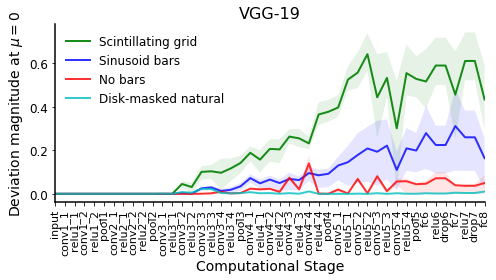

In [8]:
# VGG-19
ill_mn, ill_25, ill_75, layers = AVG_layerScore_fromdir('Data/vgg19_all_layers_SG_controls', 'Data/vgg19_1to0_L1_1to0_SG', 
                                        tag='L1_1to0__SG')
sl_mn, sl_25, sl_75, layers = AVG_layerScore_fromdir('Data/vgg19_allLayers_SineLines_Border1', 'Data/vgg19_1to0_L1_1to0_SG_SineLinesControl',
                              tag='L1_1to0__SG_SineLinesControl')
nl_mn, nl_25, nl_75, layers = AVG_layerScore_fromdir('Data/vgg19_all_layers_SG_controls', 'Data/vgg19_1to0_L1_1to0_SG_NoLinesControl',
                              tag='L1_1to0__SG_NoLinesControl')
nd_mn, nd_25, nd_75, layers = AVG_layerScore_fromdir('Data/vgg19_all_layers_SG_controls', 'Data/vgg19_1to0_L1_1to0_image_mask_dots',
                              tag='L1_1to0__image_maskdots')

# plot
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
plt.title('VGG-19', fontsize=16)
plt.xlabel('Computational Stage', fontsize=14)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=14)

plt.plot(np.arange(0,len(ill_mn),1), ill_mn, color='g', label='Scintillating grid', linewidth=2.0, alpha=0.9)
lower = ill_25
upper = ill_75
plt.fill_between(np.arange(0,len(ill_mn),1), lower, upper, facecolor='g', alpha=0.1)

plt.plot(np.arange(0,len(sl_mn),1), sl_mn, color='b', label='Sinusoid bars',linewidth=2.0, alpha=0.8)
lower = sl_25
upper = sl_75
plt.fill_between(np.arange(0,len(sl_mn),1), lower, upper, facecolor='b', alpha=0.1)

plt.plot(np.arange(0,len(nl_mn),1), nl_mn, color='r', label='No bars',linewidth=2.0, alpha=0.8)
lower = nl_25
upper = nl_75
plt.fill_between(np.arange(0,len(nl_mn),1), lower, upper, facecolor='r', alpha=0.1)

plt.plot(np.arange(0,len(nd_mn),1), nd_mn, color='c', label='Disk-masked natural',linewidth=2.0, alpha=0.8)
lower = nd_25
upper = nd_75
plt.fill_between(np.arange(0,len(nd_mn),1), lower, upper, facecolor='c', alpha=0.1)

plt.xticks(range(len(layers)), layers, size='small', rotation=90)
plt.xlim(0,len(ill_mn)-1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
#ax.set_yscale('log')
plt.legend(loc='best', fontsize=12, frameon=False)
plt.tight_layout()
plt.savefig('Figures/Layers/AVG_Combined_plot_WtoB_ron.png', dpi=800)
plt.show()

Found 345 layers...
Propagating idx: res4a, 87
Initial idx: res3b2_branch2b, 62
Max idx: res4b11_branch2c, 197
Found 345 layers...
Propagating idx: res4a_branch1, 89
Initial idx: bn3a_branch2b, 41
Max idx: res4b2_branch2c, 107
Found 345 layers...
Propagating idx: res4b18_branch2a, 263
Initial idx: res4b1_branch2b, 94
Max idx: res4b2_branch2c, 107
Found 345 layers...
Propagating idx: res4b16_branch2a, 241
Initial idx: res3a_branch2c, 43
Max idx: res3b2_branch2c, 65


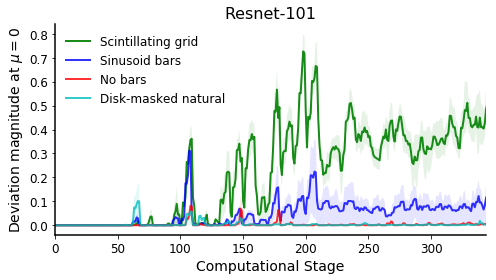

In [9]:
# resnet101
ill_mn, ill_25, ill_75, layers = AVG_layerScore_fromdir('Data/resnet101_all_layers_SG_controls', 'Data/resnet101_1to0_L1_1to0_SG',
                              tag='L1_1to0__SG', mx=345)
sl_mn, sl_25, sl_75, layers = AVG_layerScore_fromdir('Data/resnet101_allLayers_SineLines_Border1', 'Data/resnet101_1to0_L1_1to0_SG_SineLinesControl',
                              tag='L1_1to0__SG_SineLinesControl', mx=345)
nl_mn, nl_25, nl_75, layers = AVG_layerScore_fromdir('Data/resnet101_all_layers_SG_controls', 'Data/resnet101_1to0_L1_1to0_SG_NoLinesControl',
                              tag='L1_1to0__SG_NoLinesControl', mx=345)
nd_mn, nd_25, nd_75, layers = AVG_layerScore_fromdir('Data/resnet101_all_layers_SG_controls', 'Data/resnet101_1to0_L1_1to0_image_mask_dots',
                              tag='L1_1to0__image_maskdots', mx=345)


# plot
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
plt.title('Resnet-101', fontsize=16)
plt.xlabel('Computational Stage', fontsize=14)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=14)

plt.plot(np.arange(1,len(ill_mn)+1,1), ill_mn, color='g', label='Scintillating grid', linewidth=2.0, alpha=0.9)
lower = ill_25
upper = ill_75
plt.fill_between(np.arange(1,len(ill_mn)+1,1), lower, upper, facecolor='g', alpha=0.1)

plt.plot(np.arange(0,len(sl_mn),1), sl_mn, color='b', label='Sinusoid bars',linewidth=2.0, alpha=0.8)
lower = sl_25
upper = sl_75
plt.fill_between(np.arange(0,len(sl_mn),1), lower, upper, facecolor='b', alpha=0.1)

plt.plot(np.arange(1,len(nl_mn)+1,1), nl_mn, color='r', label='No bars',linewidth=2.0, alpha=0.8)
lower = nl_25
upper = nl_75
plt.fill_between(np.arange(1,len(nl_mn)+1,1), lower, upper, facecolor='r', alpha=0.1)

plt.plot(np.arange(1,len(nd_mn)+1,1), nd_mn, color='c', label='Disk-masked natural',linewidth=2.0, alpha=0.8)
lower = nd_25
upper = nd_75
plt.fill_between(np.arange(1,len(nd_mn)+1,1), lower, upper, facecolor='c', alpha=0.1)

#plt.xticks(range(len(layers)), layers, size='small', rotation=90)
plt.xlim(0,len(ill_mn)-1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.set_yscale('log')
plt.legend(loc='best', fontsize=12, frameon=False)
plt.tight_layout()
plt.savefig('Figures/Layers/AVG_Combined_plot_WtoB_ron_Resnet.png', dpi=800)
plt.show()

### Gray Background

Found 45 layers...
Propagating idx: conv3_2, 13
Initial idx: conv3_2, 13
Max idx: relu6, 39
Found 45 layers...
Propagating idx: fc6, 38
Initial idx: conv3_1, 11
Max idx: relu3_3, 16


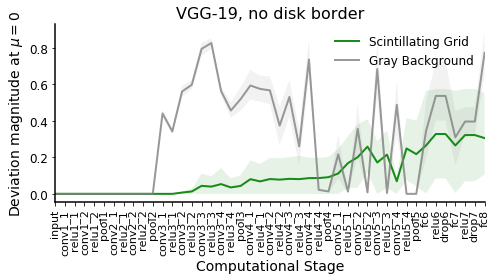

In [24]:
# VGG-19
ill_mn, ill_25, ill_75, layers = AVG_layerScore_fromdir('Data/vgg19_allLayers_SG_GrayBkd_Border0', 'Data/vgg19_1to0_L1_1to0_SG_v2', 
                                        tag='L1_1to0__SG')
nl_mn, nl_25, nl_75, layers = AVG_layerScore_fromdir('Data/vgg19_allLayers_SG_GrayBkd_Border0', 'Data/vgg19_1to0_L1_1to0_SG_GrayBkdControl',
                              tag='L1_1to0__SG_GrayBkdControl')

# plot
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
plt.title('VGG-19, no disk border', fontsize=16)
plt.xlabel('Computational Stage', fontsize=14)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=14)

plt.plot(np.arange(0,len(ill_mn),1), ill_mn, color='g', label='Scintillating Grid', linewidth=2.0, alpha=0.9)
lower = ill_25
upper = ill_75
plt.fill_between(np.arange(0,len(ill_mn),1), lower, upper, facecolor='g', alpha=0.1)

plt.plot(np.arange(0,len(nl_mn),1), nl_mn, color='0.5', label='Gray Background',linewidth=2.0, alpha=0.8)
lower = nl_25
upper = nl_75
plt.fill_between(np.arange(0,len(nl_mn),1), lower, upper, facecolor='0.5', alpha=0.1)

plt.xticks(range(len(layers)), layers, size='small', rotation=90)
plt.xlim(0,len(ill_mn)-1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
#ax.set_yscale('log')
plt.legend(loc='best', fontsize=12, frameon=False)
plt.tight_layout()
plt.savefig('Figures/Layers/AVG_GrayBkd_WtoB_border0.png', dpi=800)
plt.show()

Found 45 layers...
Propagating idx: conv3_2, 13
Initial idx: conv3_2, 13
Max idx: relu5_2, 32
Found 45 layers...
Propagating idx: fc6, 38
Initial idx: conv3_1, 11
Max idx: relu3_3, 16


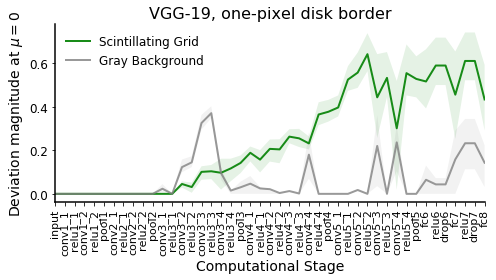

In [25]:
# VGG-19
ill_mn, ill_25, ill_75, layers = AVG_layerScore_fromdir('Data/vgg19_allLayers_SG_GrayBkd_Border1', 'Data/vgg19_1to0_L1_1to0_SG_v2_border1', 
                                        tag='L1_1to0__SG')
nl_mn, nl_25, nl_75, layers = AVG_layerScore_fromdir('Data/vgg19_allLayers_SG_GrayBkd_Border1', 'Data/vgg19_1to0_L1_1to0_SG_GrayBkdControl_border1',
                              tag='L1_1to0__SG_GrayBkdControl')

# plot
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
plt.title('VGG-19, one-pixel disk border', fontsize=16)
plt.xlabel('Computational Stage', fontsize=14)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=14)

plt.plot(np.arange(0,len(ill_mn),1), ill_mn, color='g', label='Scintillating Grid', linewidth=2.0, alpha=0.9)
lower = ill_25
upper = ill_75
plt.fill_between(np.arange(0,len(ill_mn),1), lower, upper, facecolor='g', alpha=0.1)

plt.plot(np.arange(0,len(nl_mn),1), nl_mn, color='0.5', label='Gray Background',linewidth=2.0, alpha=0.8)
lower = nl_25
upper = nl_75
plt.fill_between(np.arange(0,len(nl_mn),1), lower, upper, facecolor='0.5', alpha=0.1)

plt.xticks(range(len(layers)), layers, size='small', rotation=90)
plt.xlim(0,len(ill_mn)-1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
#ax.set_yscale('log')
plt.legend(loc='best', fontsize=12, frameon=False)
plt.tight_layout()
plt.savefig('Figures/Layers/AVG_GrayBkd_WtoB_border1.png', dpi=800)
plt.show()

Found 345 layers...
Propagating idx: bn3b3_branch2a, 70
Initial idx: res2b_branch2b, 20
Max idx: res4b12_branch2b, 206
Found 345 layers...
Propagating idx: res2b_branch2a, 17
Initial idx: res2a_branch2a, 7
Max idx: res4b5_branch2c, 137


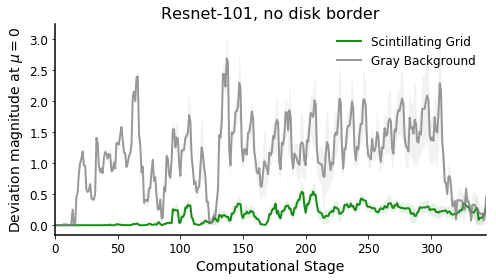

In [26]:
# Resnet-101
ill_mn, ill_25, ill_75, layers = AVG_layerScore_fromdir('Data/resnet101_allLayers_SG_GrayBkd_Border0', 'Data/resnet_1to0_L1_1to0_SG_v2', 
                                        tag='L1_1to0__SG', mx=345)
nl_mn, nl_25, nl_75, layers = AVG_layerScore_fromdir('Data/resnet101_allLayers_SG_GrayBkd_Border0', 'Data/resnet_1to0_L1_1to0_SG_GrayBkdControl',
                              tag='L1_1to0__SG_GrayBkdControl', mx=345)

# plot
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
plt.title('Resnet-101, no disk border', fontsize=16)
plt.xlabel('Computational Stage', fontsize=14)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=14)

plt.plot(np.arange(0,len(ill_mn),1), ill_mn, color='g', label='Scintillating Grid', linewidth=2.0, alpha=0.9)
lower = ill_25
upper = ill_75
plt.fill_between(np.arange(0,len(ill_mn),1), lower, upper, facecolor='g', alpha=0.1)

plt.plot(np.arange(0,len(nl_mn),1), nl_mn, color='0.5', label='Gray Background',linewidth=2.0, alpha=0.8)
lower = nl_25
upper = nl_75
plt.fill_between(np.arange(0,len(nl_mn),1), lower, upper, facecolor='0.5', alpha=0.1)

plt.xlim(0,len(ill_mn)-1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.set_yscale('log')
plt.legend(loc='best', fontsize=12, frameon=False)
plt.tight_layout()
plt.savefig('Figures/Layers/AVG_resnet_GrayBkd_WtoB_border0.png', dpi=800)
plt.show()

Found 345 layers...
Propagating idx: res4a, 87
Initial idx: res3b2_branch2b, 62
Max idx: res4b11_branch2c, 197
Found 345 layers...
Propagating idx: res4b22, 309
Initial idx: res3a_branch2b, 40
Max idx: bn4b2_branch2b, 105


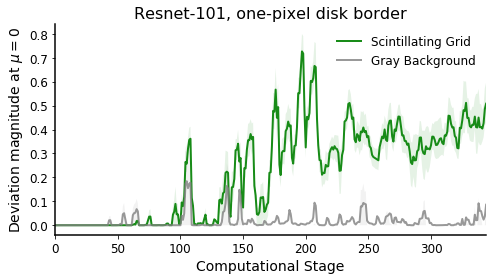

In [27]:
# Resnet-101
ill_mn, ill_25, ill_75, layers = AVG_layerScore_fromdir('Data/resnet101_allLayers_SG_GrayBkd_Border1', 'Data/resnet_1to0_L1_1to0_SG_v2', 
                                        tag='L1_1to0__SG', mx=345)
nl_mn, nl_25, nl_75, layers = AVG_layerScore_fromdir('Data/resnet101_allLayers_SG_GrayBkd_Border1', 'Data/resnet_1to0_L1_1to0_SG_GrayBkdControl',
                              tag='L1_1to0__SG_GrayBkdControl', mx=345)

# plot
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
plt.title('Resnet-101, one-pixel disk border', fontsize=16)
plt.xlabel('Computational Stage', fontsize=14)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=14)

plt.plot(np.arange(0,len(ill_mn),1), ill_mn, color='g', label='Scintillating Grid', linewidth=2.0, alpha=0.9)
lower = ill_25
upper = ill_75
plt.fill_between(np.arange(0,len(ill_mn),1), lower, upper, facecolor='g', alpha=0.1)

plt.plot(np.arange(0,len(nl_mn),1), nl_mn, color='0.5', label='Gray Background',linewidth=2.0, alpha=0.8)
lower = nl_25
upper = nl_75
plt.fill_between(np.arange(0,len(nl_mn),1), lower, upper, facecolor='0.5', alpha=0.1)

plt.xlim(0,len(ill_mn)-1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.set_yscale('log')
plt.legend(loc='best', fontsize=12, frameon=False)
plt.tight_layout()
plt.savefig('Figures/Layers/AVG_resnet_GrayBkd_WtoB_border1.png', dpi=800)
plt.show()

### Gray Background and No Borders Comparison

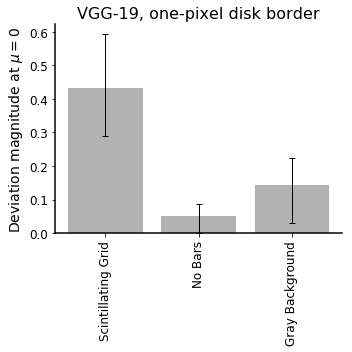

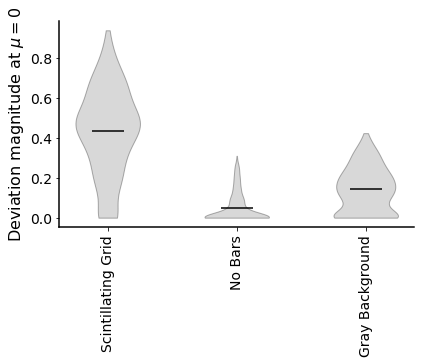

3.596834590311309e-67
5.823461611587534e-31
4.4293969729371793e-13


In [13]:
sg_filepath = 'Data\\vgg19\\MATLAB_vgg19L1_white_to_black__SG'
nl_filepath = 'Data\\vgg19\\MATLAB_vgg19L1_white_to_black__SG_NoLinesControl'
gb_filepath = 'Data\\vgg19\GrayBkd\\MATLAB_vgg19_no_randomization_fc8L1_1to0__SG_GrayBkdControl'
nb_filepath = 'Data\\vgg19\\MATLAB_vgg19L1_white_to_black__SG_noborder'

# Read data in as Numpy arrays
sg_mat = np.genfromtxt(sg_filepath, delimiter=',')
nl_mat = np.genfromtxt(nl_filepath, delimiter=',')
gb_mat = np.genfromtxt(gb_filepath, delimiter=',')
nb_mat = np.genfromtxt(nb_filepath, delimiter=',')

# Get Non-monotonicity measurements
sg_nms = Score_NonMonotonic(sg_mat, norm=True)
nl_nms = Score_NonMonotonic(nl_mat, norm=True)
gb_nms = Score_NonMonotonic(gb_mat, norm=True)
nb_nms = Score_NonMonotonic(nb_mat, norm=True)

# Make bar plot figure

sg_scores = sg_nms[:,-1]
nl_scores = nl_nms[:,-1]
gb_scores = gb_nms[:,-1]
nb_scores = nb_nms[:,-1]

plt.figure(figsize=(5,5))
plt.title('VGG-19, one-pixel disk border',fontsize=16)
plt.bar([1.0, 2.0, 3.0], [np.mean(sg_scores), np.mean(nl_scores), np.mean(gb_scores)], color='k', alpha=0.3)
plt.errorbar([1.0, 2.0, 3.0], [np.mean(sg_scores), np.mean(nl_scores), np.mean(gb_scores)], color='k',
             yerr=np.array([[np.mean(sg_scores)-np.percentile(sg_scores,25),np.mean(nl_scores)-np.percentile(nl_scores,25),np.mean(gb_scores)-np.percentile(gb_scores,25)],
                            [np.percentile(sg_scores,75)-np.mean(sg_scores),np.percentile(nl_scores,75)-np.mean(nl_scores),np.percentile(gb_scores,75)-np.mean(gb_scores)]]),
        ecolor='k', capsize=3, elinewidth=1, linewidth=0)
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=14)
plt.xticks([1.0, 2.0, 3.0], ['Scintillating Grid', 'No Bars', 'Gray Background'], fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Figures/NEW_GrayBkd_Bar.png', dpi=800)
plt.show()

# violin plot
plt.figure(figsize=(6,5))
fig = plt.violinplot([sg_scores, nl_scores, gb_scores],showmeans=True,showextrema=False)
fig['cmeans'].set_color('k')
for pc in fig['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=16)
plt.xticks([1.0, 2.0, 3.0], ['Scintillating Grid', 'No Bars', 'Gray Background'], fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figures/NEW_GrayBkd_Violin.png', dpi=800)
plt.show()
#####

from scipy.stats import mannwhitneyu
T, p = mannwhitneyu(sg_scores, gb_scores)
print (p)
T, p = mannwhitneyu(nl_scores, gb_scores)
print (p)
T, p = mannwhitneyu(sg_scores, nb_scores)
print (p)

Comparisons of SG vs GrayBkd for No lines, Border, 2X Border, 3X Border

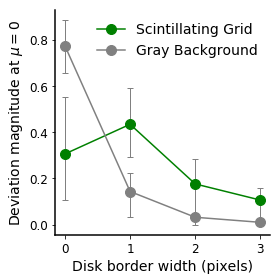

In [29]:
sg_filepath = 'Data/vgg19_all_NoBorder/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG'
nl_filepath = 'Data/vgg19_all_NoBorder/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_GrayBkdControl'

gb_filepath = 'Data\\vgg19\\MATLAB_vgg19L1_white_to_black__SG'
nb_filepath = 'Data\\vgg19\GrayBkd\\MATLAB_vgg19_no_randomization_fc8L1_1to0__SG_GrayBkdControl'

aa_filepath = 'Data/vgg19_all_DoubleSizedBorder/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG'
bb_filepath = 'Data/vgg19_all_DoubleSizedBorder/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_GrayBkdControl'

cc_filepath = 'Data/vgg19_all_TripleSizedBorder/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG'
dd_filepath = 'Data/vgg19_all_TripleSizedBorder/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_GrayBkdControl'

# Read data in as Numpy arrays
sg_mat = np.genfromtxt(sg_filepath, delimiter=',')
nl_mat = np.genfromtxt(nl_filepath, delimiter=',')
gb_mat = np.genfromtxt(gb_filepath, delimiter=',')
nb_mat = np.genfromtxt(nb_filepath, delimiter=',')
aa_mat = np.genfromtxt(aa_filepath, delimiter=',')
bb_mat = np.genfromtxt(bb_filepath, delimiter=',')
cc_mat = np.genfromtxt(cc_filepath, delimiter=',')
dd_mat = np.genfromtxt(dd_filepath, delimiter=',')


# Get Non-monotonicity measurements
sg_nms = Score_NonMonotonic(sg_mat, norm=True)
nl_nms = Score_NonMonotonic(nl_mat, norm=True)
gb_nms = Score_NonMonotonic(gb_mat, norm=True)
nb_nms = Score_NonMonotonic(nb_mat, norm=True)
aa_nms = Score_NonMonotonic(aa_mat, norm=True)
bb_nms = Score_NonMonotonic(bb_mat, norm=True)
cc_nms = Score_NonMonotonic(cc_mat, norm=True)
dd_nms = Score_NonMonotonic(dd_mat, norm=True)


# Make bar plot figure

sg_scores = sg_nms[:,-1]
nl_scores = nl_nms[:,-1]
gb_scores = gb_nms[:,-1]
nb_scores = nb_nms[:,-1]
aa_scores = aa_nms[:,-1]
bb_scores = bb_nms[:,-1]
cc_scores = cc_nms[:,-1]
dd_scores = dd_nms[:,-1]


plt.figure(figsize=(4,4))
plt.errorbar([0, 0, 1, 1, 2, 2, 3, 3], [np.mean(sg_scores), np.mean(nl_scores), np.mean(gb_scores), np.mean(nb_scores), np.mean(aa_scores), np.mean(bb_scores), np.mean(cc_scores), np.mean(dd_scores)], color='k',
             yerr=np.array([[np.mean(sg_scores)-np.percentile(sg_scores,25),np.mean(nl_scores)-np.percentile(nl_scores,25),np.mean(gb_scores)-np.percentile(gb_scores,25),np.mean(nb_scores)-np.percentile(nb_scores,25),np.mean(aa_scores)-np.percentile(aa_scores,25),np.mean(bb_scores)-np.percentile(bb_scores,25),np.mean(cc_scores)-np.percentile(cc_scores,25),np.mean(dd_scores)-np.percentile(dd_scores,25)],
                            [np.percentile(sg_scores,75)-np.mean(sg_scores),np.percentile(nl_scores,75)-np.mean(nl_scores),np.percentile(gb_scores,75)-np.mean(gb_scores),np.percentile(nb_scores,75)-np.mean(nb_scores),np.percentile(aa_scores,75)-np.mean(aa_scores),np.percentile(bb_scores,75)-np.mean(bb_scores),np.percentile(cc_scores,75)-np.mean(cc_scores),np.percentile(dd_scores,75)-np.mean(dd_scores)]]),
        ecolor='0.5', capsize=3, elinewidth=1, linewidth=0)
plt.plot([0, 1, 2, 3], [np.mean(sg_scores), np.mean(gb_scores), np.mean(aa_scores), np.mean(cc_scores)],  'o-', color='g', markersize=10, linewidth=1.5, label='Scintillating Grid')
plt.plot([0, 1, 2, 3], [np.mean(nl_scores), np.mean(nb_scores), np.mean(bb_scores), np.mean(dd_scores)], 'o-', color='0.5', markersize=10, linewidth=1.5, label='Gray Background')
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=14)
plt.xlabel(r'Disk border width (pixels)', fontsize=14)
plt.xticks(np.arange(0,4,1),fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='best', frameon=False)
plt.tight_layout()
plt.savefig('Figures/NEW_GrayBkd_SG_Border_Bar.png', dpi=800)
plt.show()

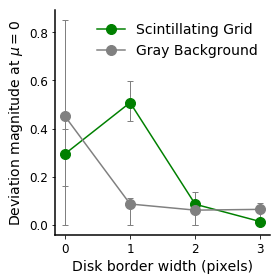

In [30]:
# Resnet

sg_filepath = 'Data/resnet101_topLayer_allExp_Border0/MATLAB_resnet101_no_randomization_1_fc1000L1_1to0__SG'
nl_filepath = 'Data/resnet101_topLayer_allExp_Border0/MATLAB_resnet101_no_randomization_1_fc1000L1_1to0__SG_GrayBkdControl'

gb_filepath = 'Data/resnet101_topLayer_allExp_Border1/MATLAB_resnet101_no_randomization_1_fc1000L1_1to0__SG'
nb_filepath = 'Data/resnet101_topLayer_allExp_Border1/MATLAB_resnet101_no_randomization_1_fc1000L1_1to0__SG_GrayBkdControl'

aa_filepath = 'Data/resnet101_topLayer_allExp_Border2/MATLAB_resnet101_no_randomization_1_fc1000L1_1to0__SG'
bb_filepath = 'Data/resnet101_topLayer_allExp_Border2/MATLAB_resnet101_no_randomization_1_fc1000L1_1to0__SG_GrayBkdControl'

cc_filepath = 'Data/resnet101_topLayer_allExp_Border3/MATLAB_resnet101_no_randomization_1_fc1000L1_1to0__SG'
dd_filepath = 'Data/resnet101_topLayer_allExp_Border3/MATLAB_resnet101_no_randomization_1_fc1000L1_1to0__SG_GrayBkdControl'


# Read data in as Numpy arrays
sg_mat = np.genfromtxt(sg_filepath, delimiter=',')
nl_mat = np.genfromtxt(nl_filepath, delimiter=',')
gb_mat = np.genfromtxt(gb_filepath, delimiter=',')
nb_mat = np.genfromtxt(nb_filepath, delimiter=',')
aa_mat = np.genfromtxt(aa_filepath, delimiter=',')
bb_mat = np.genfromtxt(bb_filepath, delimiter=',')
cc_mat = np.genfromtxt(cc_filepath, delimiter=',')
dd_mat = np.genfromtxt(dd_filepath, delimiter=',')


# Get Non-monotonicity measurements
sg_nms = Score_NonMonotonic(sg_mat, norm=True)
nl_nms = Score_NonMonotonic(nl_mat, norm=True)
gb_nms = Score_NonMonotonic(gb_mat, norm=True)
nb_nms = Score_NonMonotonic(nb_mat, norm=True)
aa_nms = Score_NonMonotonic(aa_mat, norm=True)
bb_nms = Score_NonMonotonic(bb_mat, norm=True)
cc_nms = Score_NonMonotonic(cc_mat, norm=True)
dd_nms = Score_NonMonotonic(dd_mat, norm=True)


# Make bar plot figure

sg_scores = sg_nms[:,-1]
nl_scores = nl_nms[:,-1]
gb_scores = gb_nms[:,-1]
nb_scores = nb_nms[:,-1]
aa_scores = aa_nms[:,-1]
bb_scores = bb_nms[:,-1]
cc_scores = cc_nms[:,-1]
dd_scores = dd_nms[:,-1]


plt.figure(figsize=(4,4))
plt.errorbar([0, 0, 1, 1, 2, 2, 3, 3], [np.mean(sg_scores), np.mean(nl_scores), np.mean(gb_scores), np.mean(nb_scores), np.mean(aa_scores), np.mean(bb_scores), np.mean(cc_scores), np.mean(dd_scores)], color='k',
             yerr=np.array([[np.mean(sg_scores)-np.percentile(sg_scores,25),np.mean(nl_scores)-np.percentile(nl_scores,25),np.mean(gb_scores)-np.percentile(gb_scores,25),np.mean(nb_scores)-np.percentile(nb_scores,25),np.mean(aa_scores)-np.percentile(aa_scores,25),np.mean(bb_scores)-np.percentile(bb_scores,25),np.mean(cc_scores)-np.percentile(cc_scores,25),np.mean(dd_scores)-np.percentile(dd_scores,25)],
                            [np.percentile(sg_scores,75)-np.mean(sg_scores),np.percentile(nl_scores,75)-np.mean(nl_scores),np.percentile(gb_scores,75)-np.mean(gb_scores),np.percentile(nb_scores,75)-np.mean(nb_scores),np.percentile(aa_scores,75)-np.mean(aa_scores),np.percentile(bb_scores,75)-np.mean(bb_scores),np.percentile(cc_scores,75)-np.mean(cc_scores),np.percentile(dd_scores,75)-np.mean(dd_scores)]]),
        ecolor='0.5', capsize=3, elinewidth=1, linewidth=0)
plt.plot([0, 1, 2, 3], [np.mean(sg_scores), np.mean(gb_scores), np.mean(aa_scores), np.mean(cc_scores)],  'o-', color='g', markersize=10, linewidth=1.5, label='Scintillating Grid')
plt.plot([0, 1, 2, 3], [np.mean(nl_scores), np.mean(nb_scores), np.mean(bb_scores), np.mean(dd_scores)], 'o-', color='0.5', markersize=10, linewidth=1.5, label='Gray Background')
plt.ylabel(r'Deviation magnitude at $\mu = 0$', fontsize=14)
plt.xlabel(r'Disk border width (pixels)', fontsize=14)
plt.xticks(np.arange(0,4,1),fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='best', frameon=False)
plt.tight_layout()
plt.savefig('Figures/NEW_resnet_GrayBkd_SG_Border_Bar.png', dpi=800)
plt.show()

# White -> Gray -> Black NumDots Experiment (for revision)

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:82: MatplotlibDeprecationWarning: numpy.arange


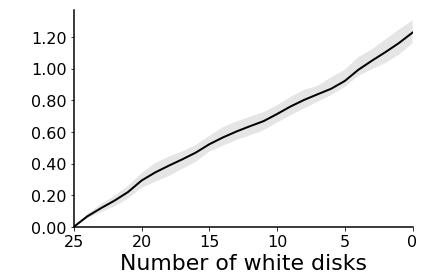

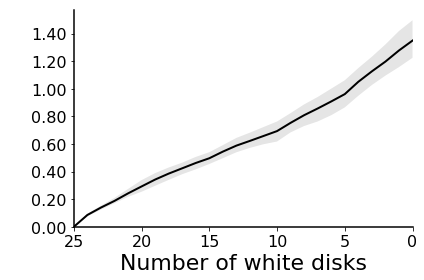

In [3]:
AVG_DLfc8Grapher('vgg19_num_dots_contol/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_NumDotsControl_GraytoBlack', 'nonorm_NumDots_GtoB', [0, 25, 1], 'nonorm_NumDots_GtoB', 'Number of white disks', labels=[False, True],norm=False)
AVG_DLfc8Grapher('vgg19_num_dots_contol/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_NumDotsControl_WhiteToGray', 'nonorm_NumDots_WtoG', [0, 25, 1], 'nonorm_NumDots_WtoG', 'Number of white disks', labels=[False, True],norm=False)

In [29]:
def AVG_DLfc8Grapher_Combined (filenames, saved_name, frange_list, title, x_title, labels, metric='no', norm=False, show_title=False):
    '''
    norm = True --> normalize by average R
    '''
    
    # read file
    imported_file1 = np.genfromtxt('Data/'+filenames[0], delimiter=',')
    imported_file2 = np.genfromtxt('Data/'+filenames[1], delimiter=',')
    imported_file = np.hstack([imported_file1, imported_file2[:,1:]])
    
    # normalize
    if norm is True:
        #row_sums = np.sum(imported_file,axis=1)
        row_means = np.mean(imported_file,axis=1)
        for row in range(imported_file.shape[0]):
            if row_means[row] > 0:
                imported_file[row,:] = imported_file[row,:]/row_means[row]
    
    # get average and error bars
    fc8_diss_values = np.mean(imported_file, axis=0)
    #sems = np.std(imported_file, axis=0)
    #lower = fc8_diss_values - sems
    #upper = fc8_diss_values + sems
    lower = np.percentile(imported_file, 25, axis=0)
    upper = np.percentile(imported_file, 75, axis=0)
    
    # get task names
    taskNames = pl.frange(frange_list[0], frange_list[1], frange_list[2])   
    N = len(taskNames) - len(fc8_diss_values)
    taskNames = taskNames[N:]
    # converting to python list and rounding so human_point matches exactly
    taskNamesconverted = np.ndarray.tolist(taskNames)
    taskNames = [round(n, 2) for n in taskNamesconverted]

    # plot figure
    from matplotlib.ticker import FormatStrFormatter
    fig, ax = plt.subplots()
    if show_title is True:
        plt.title(title, fontsize=24)
    plt.plot(taskNames, fc8_diss_values, 'k', linewidth=2.0)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.fill_between(taskNames, lower, upper, facecolor='k', alpha=0.1)
    if labels[0] is True:
        plt.ylabel('Rep. dissimilarity, $R$', fontsize=22)
    elif labels[0] is 'r':
        plt.ylabel('Rep. dissimilarity, $r$', fontsize=22)
    else:
        plt.ylabel('  ', fontsize=22)
    if labels[1] is True:
        plt.xlabel(x_title, fontsize=22)
    else:
        plt.xlabel('  ', fontsize=22)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(np.min(taskNames), np.max(taskNames))
    plt.ylim(0,None)
    plt.tight_layout()
    plt.savefig('Figures/FIGURES/AVG_'+saved_name+'.png', dpi=800)
    plt.show()

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: MatplotlibDeprecationWarning: numpy.arange


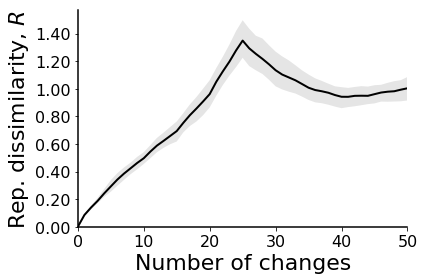

In [30]:
AVG_DLfc8Grapher_Combined(['vgg19_num_dots_contol/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_NumDotsControl_WhiteToGray',
                 'vgg19_num_dots_contol/MATLAB_vgg19_no_randomization_1_fc8L1_1to0__SG_NumDotsControl_GraytoBlackWhiteRef'],
                 'WhiteToGrayToBlack', [0, 50, 1], 'WhiteToGrayToBlack', 'Number of changes', 
                 labels=[True, True],norm=False)